In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df  = pd.read_csv("DS1_C5_S4_Credit_Data_Hackathon.csv")

In [3]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


### Cleaning the data - Level -0 basic analysis

In [4]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE',
       'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')

In [5]:
df.shape

(100000, 24)

In [6]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1


In [7]:
df.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2
99999,216090,0,Revolving loans,M,Y,Y,0,202500.0,337500.0,337500.0,...,-3230,1,1,1,1,0,Drivers,2.0,SATURDAY,0


In [122]:
df.shape

(100000, 24)

To find out , how many columns and rows are present in the data  

#### Checking if there is any null values are present 

In [8]:
df.isnull().sum()

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           81
NAME_TYPE_SUITE          405
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

- There are some null values present in the columns  

#### Checking for Types of the columns present in the data 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           100000 non-null  int64  
 1   TARGET               100000 non-null  int64  
 2   NAME_CONTRACT_TYPE   100000 non-null  object 
 3   GENDER               100000 non-null  object 
 4   Car                  100000 non-null  object 
 5   House                100000 non-null  object 
 6   CNT_CHILDREN         100000 non-null  int64  
 7   AMT_INCOME_TOTAL     100000 non-null  float64
 8   AMT_CREDIT           100000 non-null  float64
 9   AMT_GOODS_PRICE      99919 non-null   float64
 10  NAME_TYPE_SUITE      99595 non-null   object 
 11  NAME_INCOME_TYPE     100000 non-null  object 
 12  NAME_EDUCATION_TYPE  100000 non-null  object 
 13  NAME_FAMILY_STATUS   100000 non-null  object 
 14  DAYS_EMPLOYED        100000 non-null  int64  
 15  MOBILE            

- There are int , float and object present the data (df)

### Separating categorical and numerical columns 

 - We are going to write a program to separate the categorical and numerical columns 
 - By this we can easily identify the columns whether it is in categorical or numerical  

In [10]:
numeric_columns = []
categorical_columns = []

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        numeric_columns.append(column)
    else:
        categorical_columns.append(column)

table = [numeric_columns, categorical_columns]
print(tabulate({"numerical":numeric_columns,
                "categorical": categorical_columns}, headers = ["numerical", "categorical"]))

numerical            categorical
-------------------  -------------------
SK_ID_CURR           NAME_CONTRACT_TYPE
TARGET               GENDER
CNT_CHILDREN         Car
AMT_INCOME_TOTAL     House
AMT_CREDIT           NAME_TYPE_SUITE
AMT_GOODS_PRICE      NAME_INCOME_TYPE
DAYS_EMPLOYED        NAME_EDUCATION_TYPE
MOBILE               NAME_FAMILY_STATUS
WORK_PHONE           OCCUPATION_TYPE
HOME_PHONE           APPLICATION_DAY
MOBILE_REACHABLE
FLAG_EMAIL
CNT_FAM_MEMBERS
TOTAL_DOC_SUBMITTED


### Performing Uni- variant Analysis for all Categorical columns

This function will check for the following 
- Unique values 
- Mode 
- Total count of missing values

In [11]:
def info_of_cat(col):
    print(f"Unique values in {col} are :{df[col].unique()}")
    print(f"Mode of {col} is : {df[col].mode()[0]}")
    print(f"Number of missing values in {col} is : {df[col].isnull().sum()}")

In [12]:
info_of_cat("NAME_CONTRACT_TYPE")

Unique values in NAME_CONTRACT_TYPE are :['Cash loans' 'Revolving loans']
Mode of NAME_CONTRACT_TYPE is : Cash loans
Number of missing values in NAME_CONTRACT_TYPE is : 0


#### Visualize  NAME_CONTRACT_TYPE column 

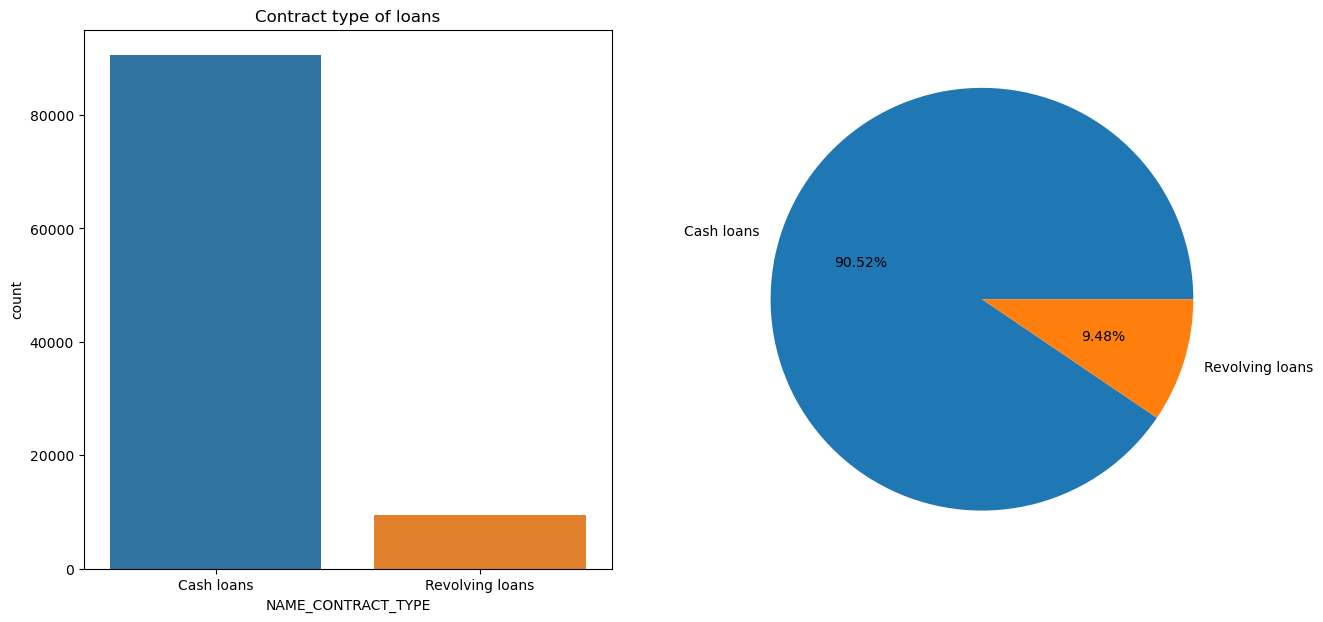

In [13]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Contract type of loans")                  
percentage = df["NAME_CONTRACT_TYPE"].value_counts()         
labels = list(df["NAME_CONTRACT_TYPE"].value_counts().index) 

sns.countplot(x = df["NAME_CONTRACT_TYPE"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%") 
plt.show()

#### Visualize the Gender column

In [14]:
info_of_cat("GENDER")

Unique values in GENDER are :['M' 'F' 'XNA']
Mode of GENDER is : F
Number of missing values in GENDER is : 0


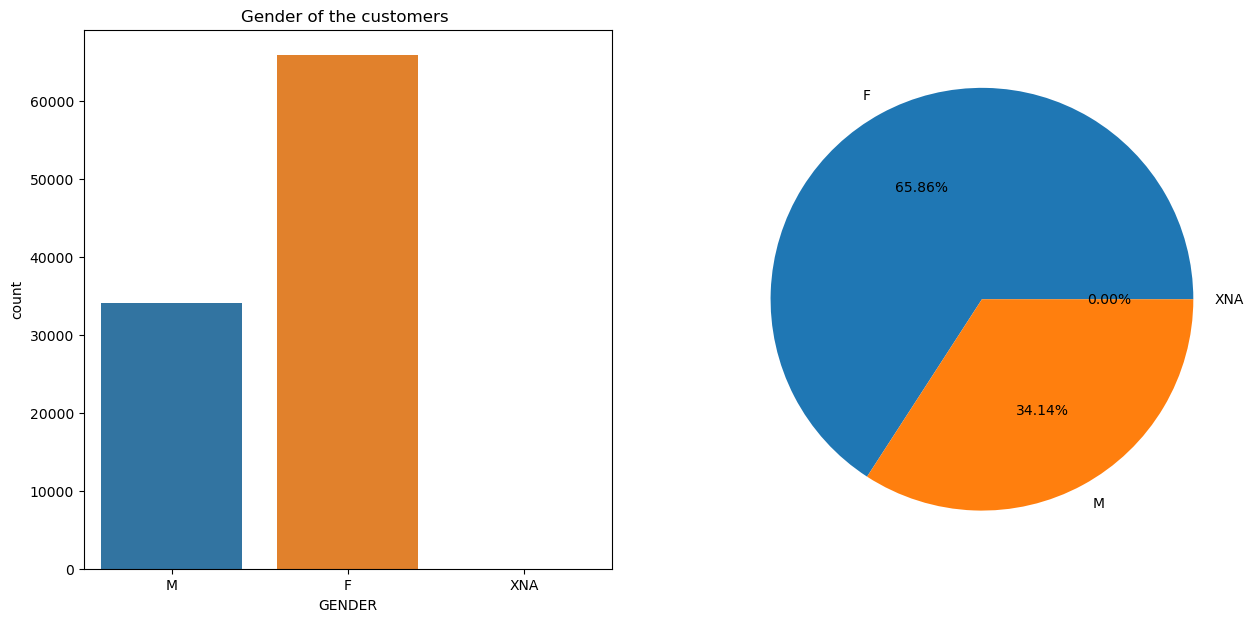

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Gender of the customers ")                  
percentage = df["GENDER"].value_counts()         
labels = list(df["GENDER"].value_counts().index) 

sns.countplot(x = df["GENDER"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%") 
plt.show()

#### Visulize the car column

In [16]:
info_of_cat("Car")

Unique values in Car are :['N' 'Y']
Mode of Car is : N
Number of missing values in Car is : 0


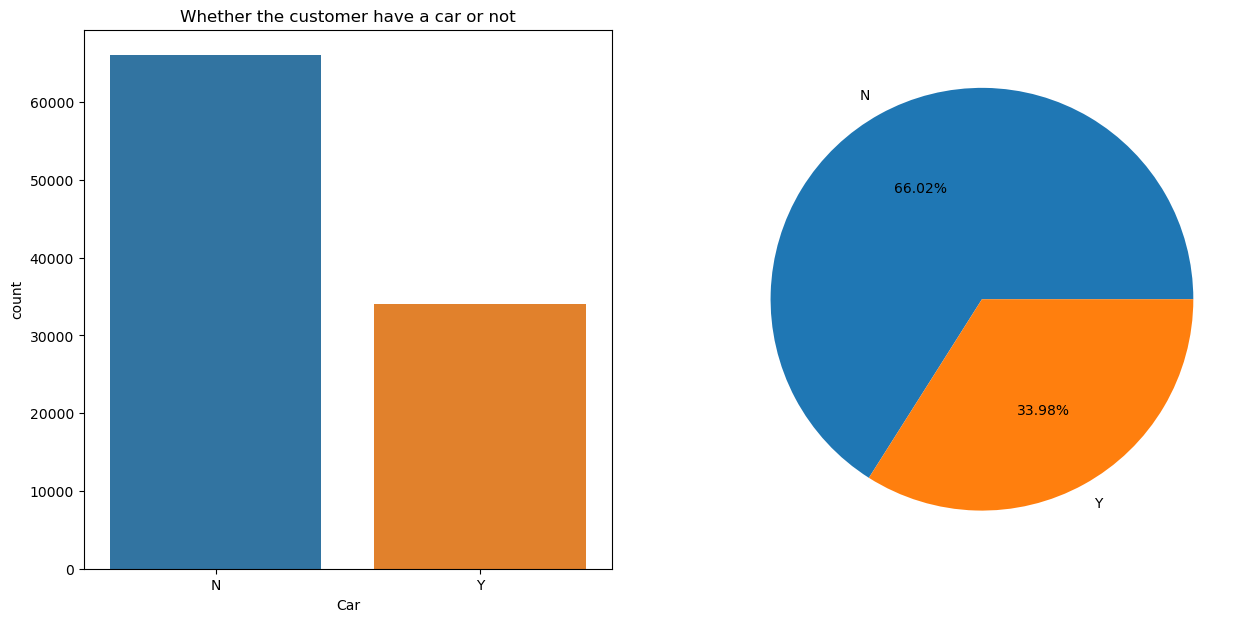

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Whether the customer have a car or not")                  
percentage = df["Car"].value_counts()         
labels = list(df["Car"].value_counts().index) 

sns.countplot(x = df["Car"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%") 
plt.show()

#### Visualize the House column

In [18]:
info_of_cat("House")

Unique values in House are :['Y' 'N']
Mode of House is : Y
Number of missing values in House is : 0


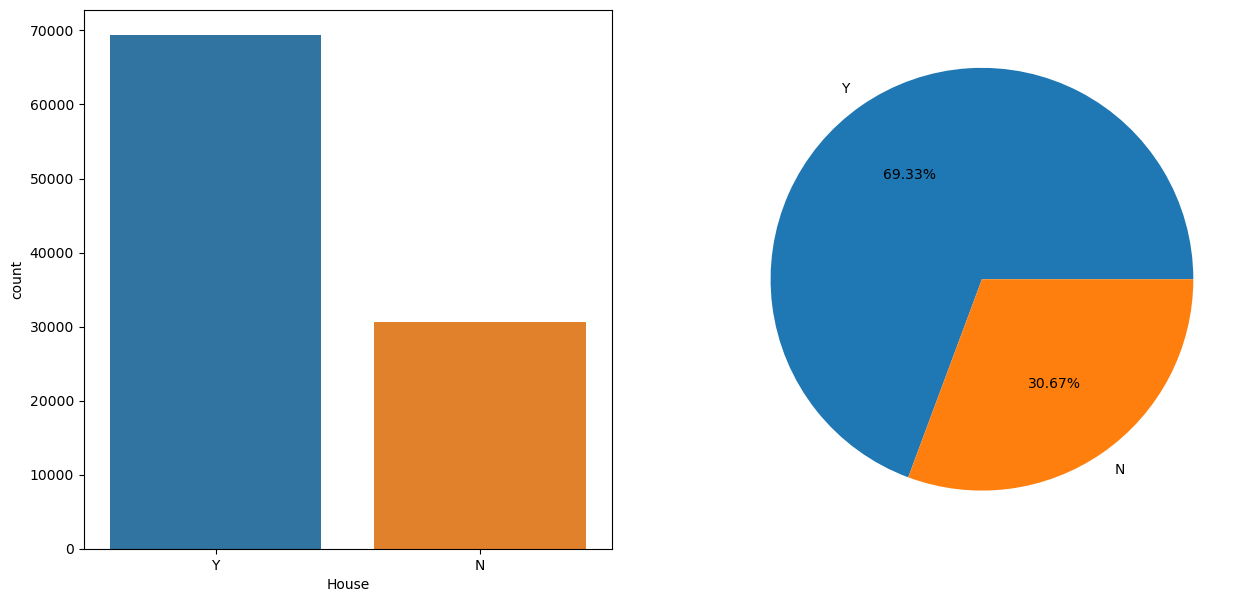

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))                  
percentage = df["House"].value_counts()         
labels = list(df["House"].value_counts().index) 

sns.countplot(x = df["House"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%") 
plt.show()

#### Visualize NAME_TYPE_SUITE column

In [20]:
info_of_cat("NAME_TYPE_SUITE")

Unique values in NAME_TYPE_SUITE are :['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
Mode of NAME_TYPE_SUITE is : Unaccompanied
Number of missing values in NAME_TYPE_SUITE is : 405


In [21]:
df["NAME_TYPE_SUITE"].fillna("Unaccompanied" , inplace=True)

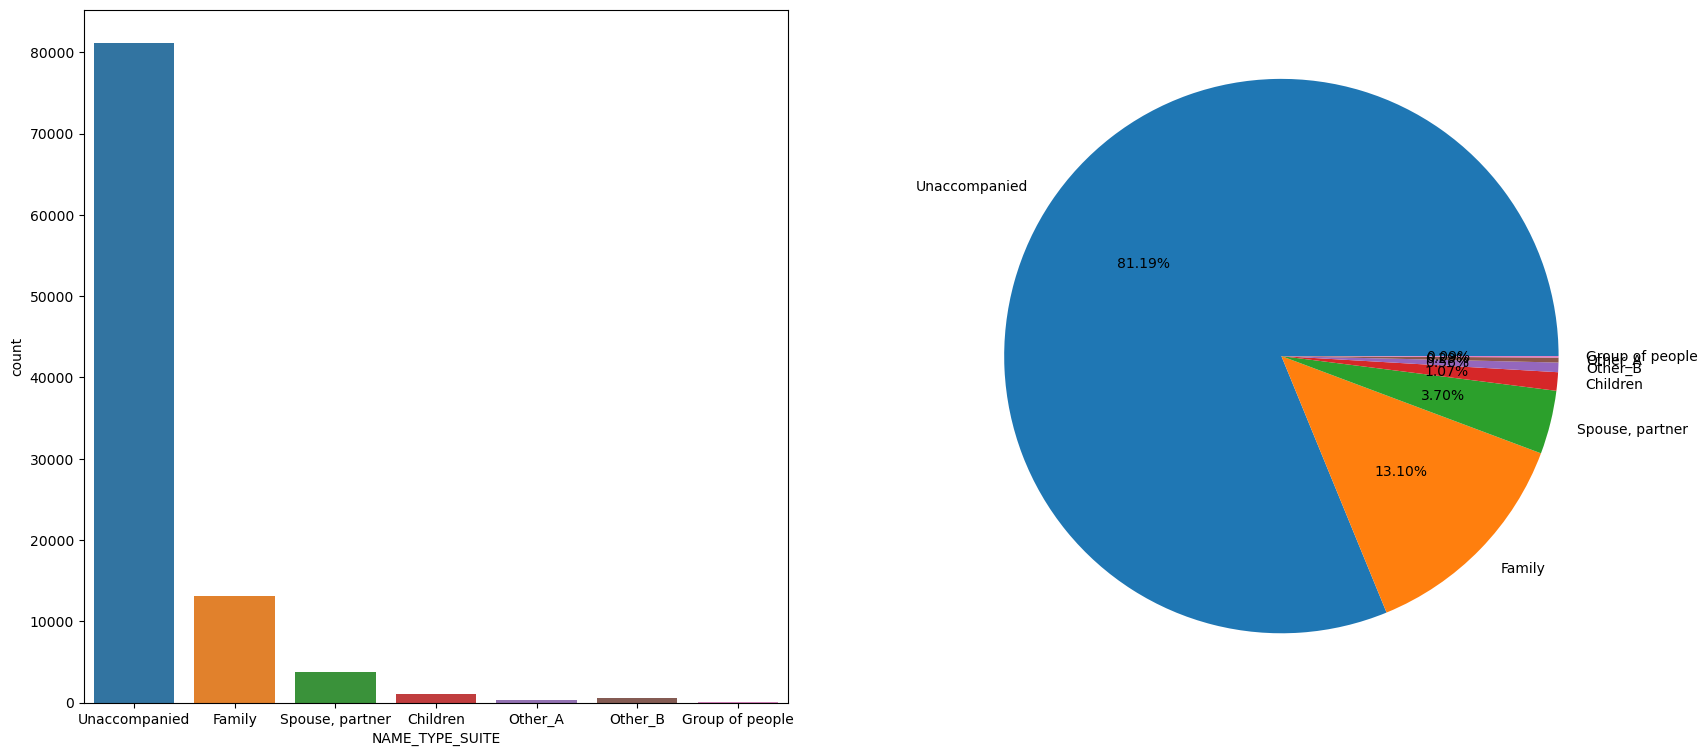

In [22]:
fig, ax = plt.subplots(1, 2, figsize = (20, 9))                  
percentage = df["NAME_TYPE_SUITE"].value_counts()         
labels = list(df["NAME_TYPE_SUITE"].value_counts().index) 

sns.countplot(x = df["NAME_TYPE_SUITE"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%") 
plt.show()

#### Visualize NAME_INCOME_TYPE column

In [23]:
info_of_cat("NAME_INCOME_TYPE")

Unique values in NAME_INCOME_TYPE are :['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
Mode of NAME_INCOME_TYPE is : Working
Number of missing values in NAME_INCOME_TYPE is : 0


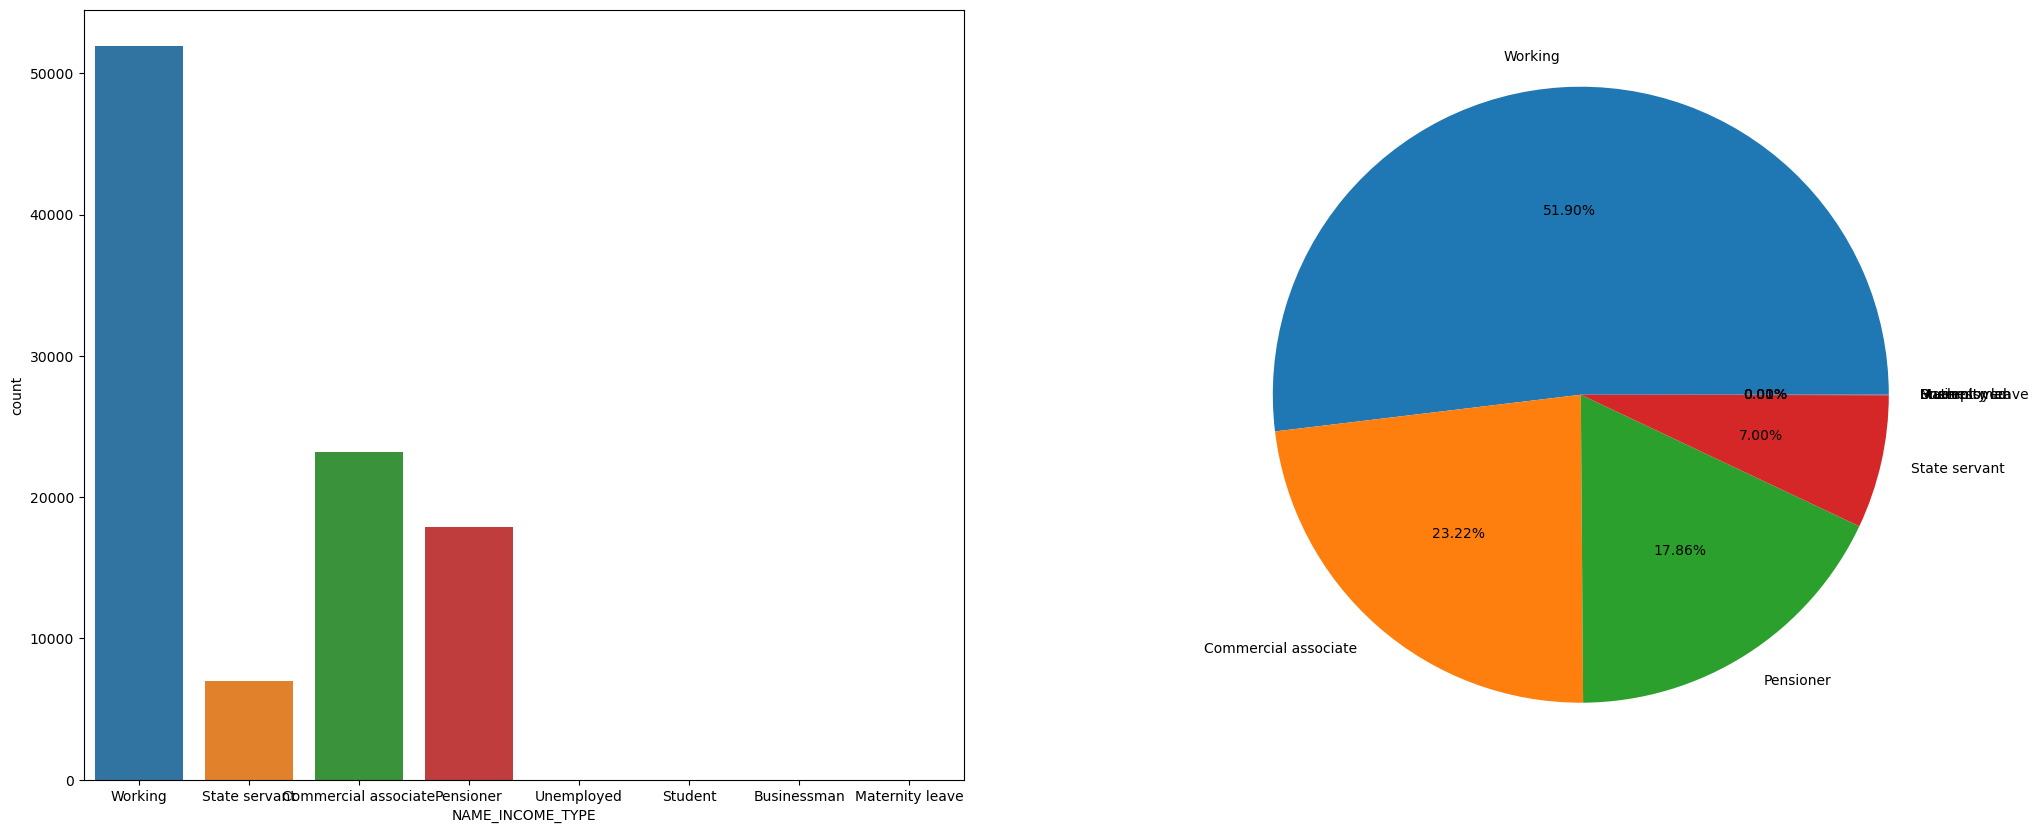

In [24]:
fig, ax = plt.subplots(1, 2, figsize = (25, 10))                  
percentage = df["NAME_INCOME_TYPE"].value_counts()         
labels = list(df["NAME_INCOME_TYPE"].value_counts().index) 

sns.countplot(x = df["NAME_INCOME_TYPE"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%") 
plt.show()

#### Visualize NAME_EDUCATION_TYPE column

In [25]:
info_of_cat("NAME_EDUCATION_TYPE")

Unique values in NAME_EDUCATION_TYPE are :['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Mode of NAME_EDUCATION_TYPE is : Secondary / secondary special
Number of missing values in NAME_EDUCATION_TYPE is : 0


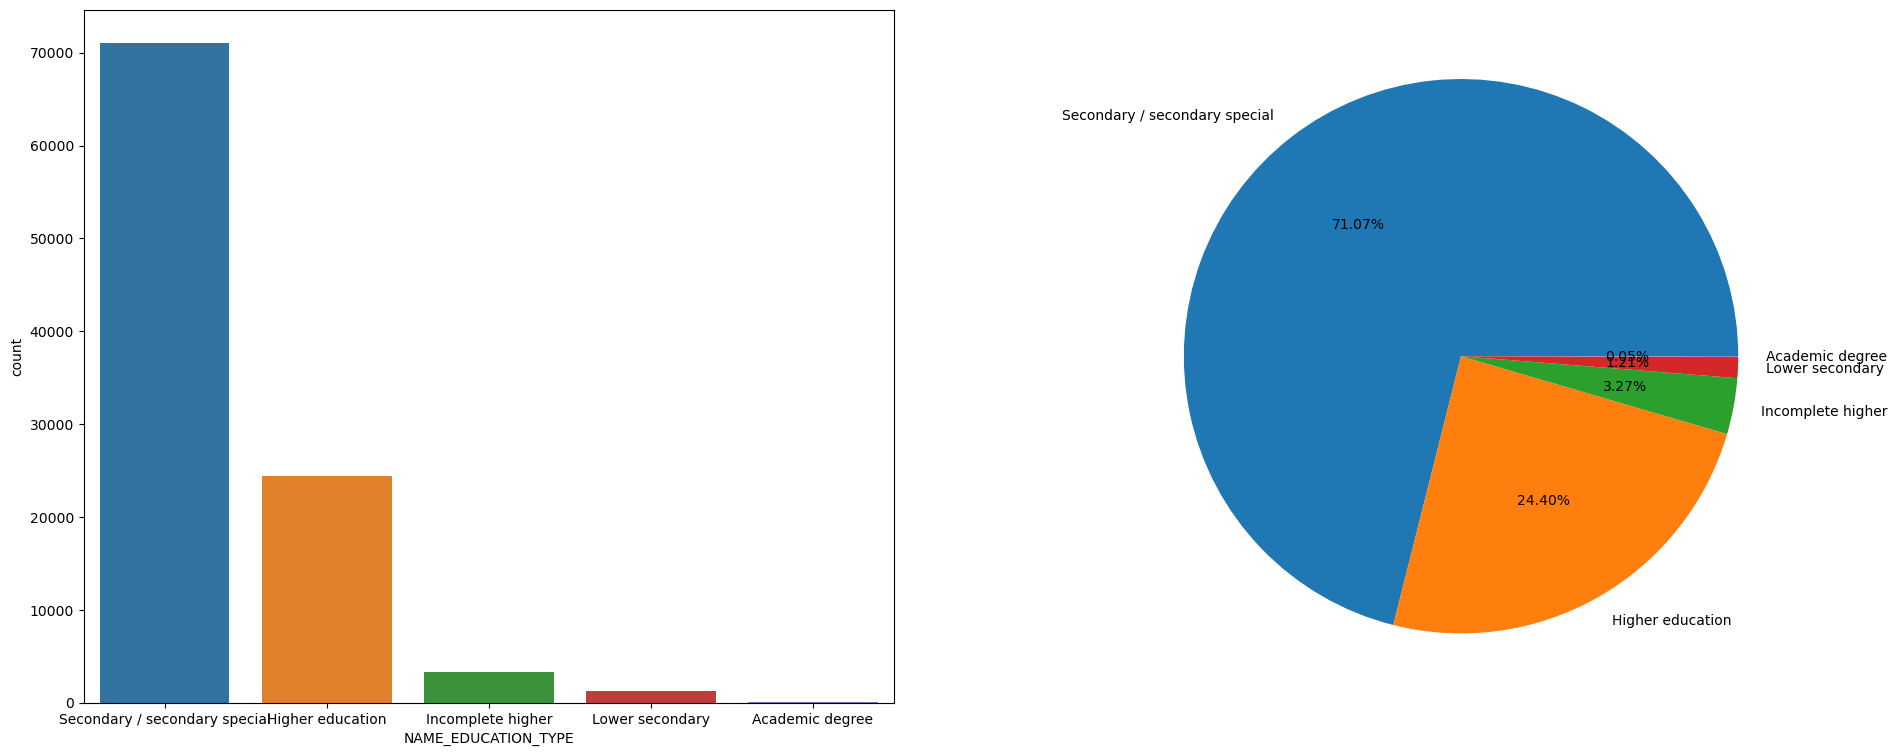

In [26]:
fig, ax = plt.subplots(1, 2, figsize = (23, 9))                  
percentage = df["NAME_EDUCATION_TYPE"].value_counts()         
labels = list(df["NAME_EDUCATION_TYPE"].value_counts().index) 

sns.countplot(x = df["NAME_EDUCATION_TYPE"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%") 
plt.show()

#### Visualize NAME_FAMILY_STATUS column

In [27]:
info_of_cat("NAME_FAMILY_STATUS")

Unique values in NAME_FAMILY_STATUS are :['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
Mode of NAME_FAMILY_STATUS is : Married
Number of missing values in NAME_FAMILY_STATUS is : 0


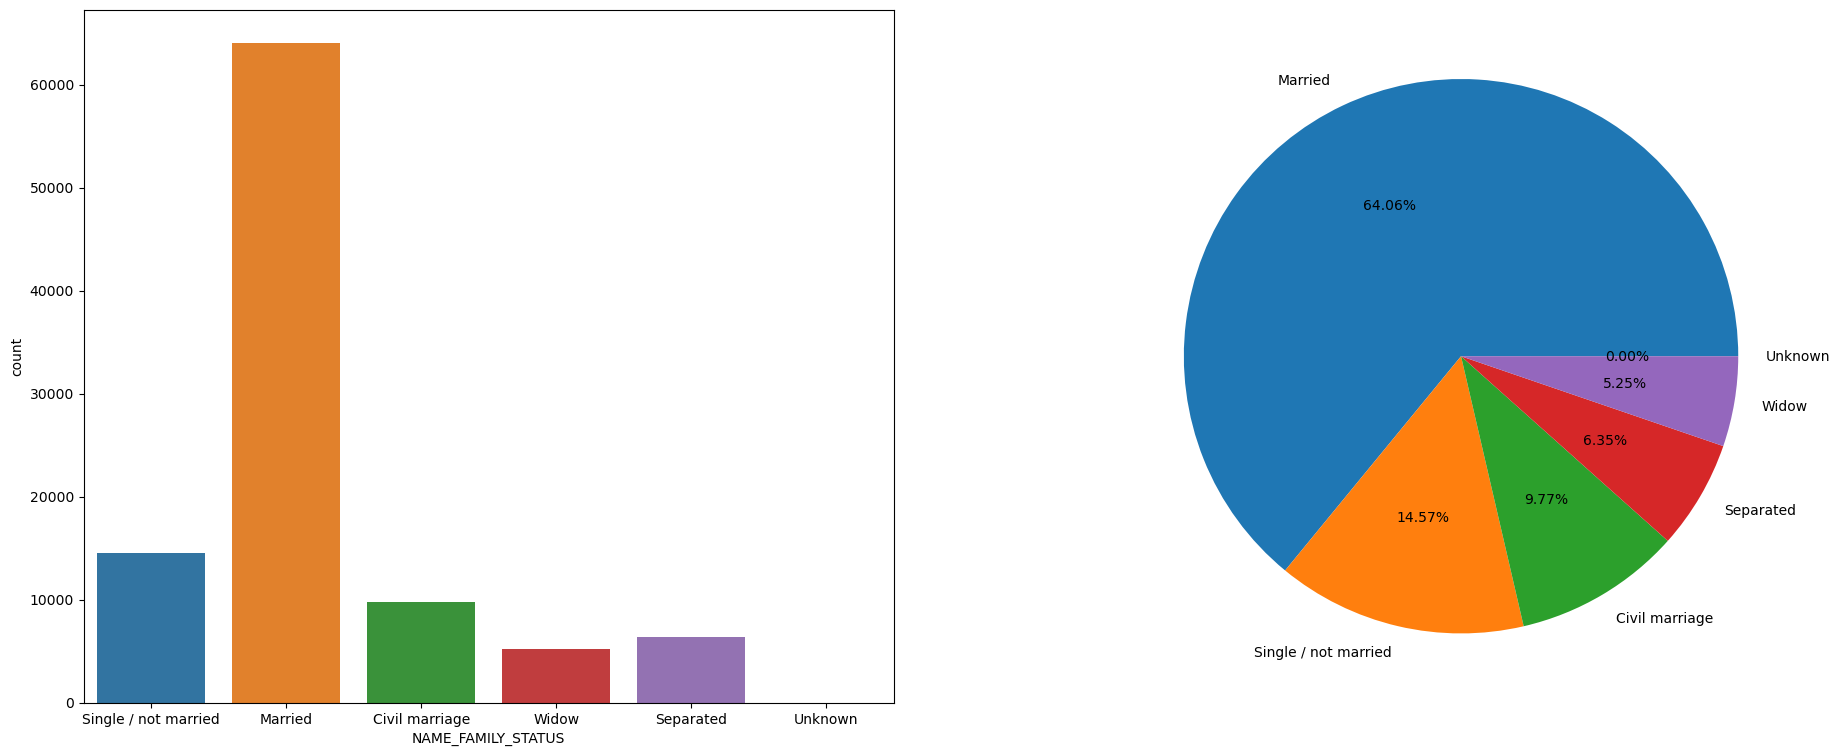

In [28]:
fig, ax = plt.subplots(1, 2, figsize = (23, 9))                  
percentage = df["NAME_FAMILY_STATUS"].value_counts()         
labels = list(df["NAME_FAMILY_STATUS"].value_counts().index) 

sns.countplot(x = df["NAME_FAMILY_STATUS"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%") 
plt.show()

#### visualize OCCUPATION_TYPE column

In [29]:
info_of_cat("OCCUPATION_TYPE")

Unique values in OCCUPATION_TYPE are :['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']
Mode of OCCUPATION_TYPE is : Laborers
Number of missing values in OCCUPATION_TYPE is : 31224


In [30]:
df["OCCUPATION_TYPE"].fillna("Laborers",inplace=True)

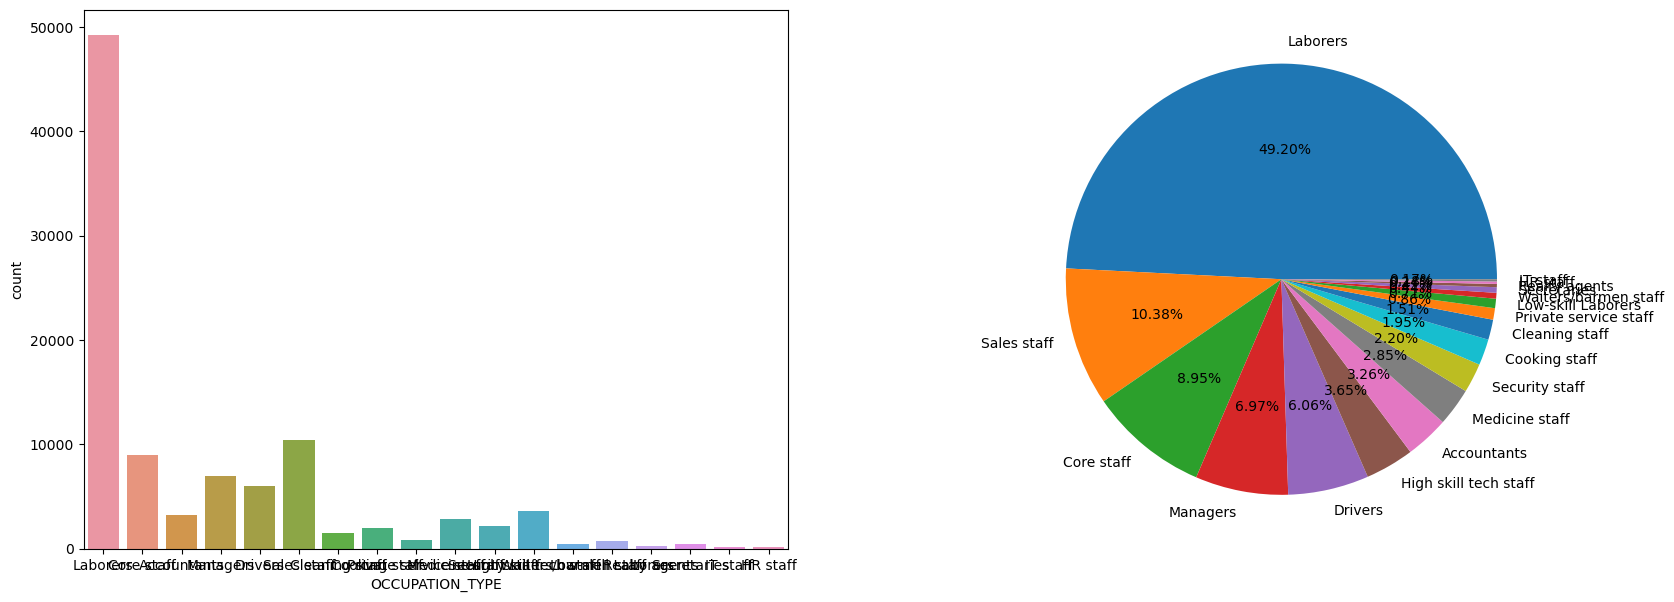

In [31]:
fig, ax = plt.subplots(1, 2, figsize = (20, 7))                  
percentage = df["OCCUPATION_TYPE"].value_counts()         
labels = list(df["OCCUPATION_TYPE"].value_counts().index) 

sns.countplot(x = df["OCCUPATION_TYPE"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%") 
plt.show()

#### Visulaize APPLICATION_DAY column

In [32]:
info_of_cat("APPLICATION_DAY")

Unique values in APPLICATION_DAY are :['WEDNESDAY' 'MONDAY' 'THURSDAY' 'SUNDAY' 'SATURDAY' 'FRIDAY' 'TUESDAY']
Mode of APPLICATION_DAY is : TUESDAY
Number of missing values in APPLICATION_DAY is : 0


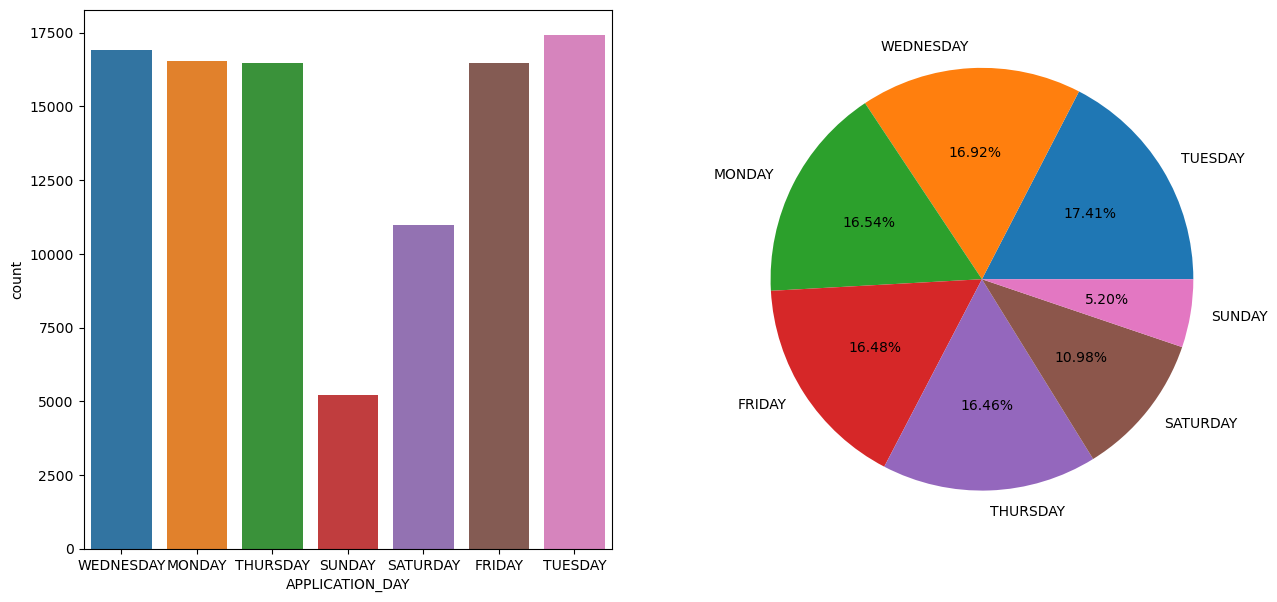

In [33]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))                  
percentage = df["APPLICATION_DAY"].value_counts()         
labels = list(df["APPLICATION_DAY"].value_counts().index) 

sns.countplot(x = df["APPLICATION_DAY"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%") 
plt.show()

#### Here we have done uni-variant Analysis for all the categorical column
 - some of thecolumn has so many of unique values so its difficult by identifying those in the graphs 
 - The Uni variant analysis are done only for the categorical columns , so i used Bar chart and pie chart for the analysis 


### Uni-variant Analysis for all the numerical column

Check if the data is discrete or continuous. \
Measure the central tendency (mean, median, mode) \
Measure the dispersion values \
Check for missing values \
Checking for skewness\
Check for outliers \
Think about how the missing values could be treated. \
Think about the kind of graph/chart that can be plotted using this data.

In [34]:
def info_of_numeric(col):
    print(f"The mean of column {col} is {df[col].mean()}")
    print(f"The median of column {col} is {df[col].median()}")
    print(f"The mode of column {col} is {df[col].mode()[0]}")
    print(f"The std of column {col} is {df[col].std()}")
    print(f"Number of missing values in column {col} is {df[col].isnull().sum()}")

#### 1) Visualize SK_ID_CURR column

In [35]:
info_of_numeric("SK_ID_CURR")

The mean of column SK_ID_CURR is 158006.14086
The median of column SK_ID_CURR is 157877.0
The mode of column SK_ID_CURR is 100002
The std of column SK_ID_CURR is 33481.16699608501
Number of missing values in column SK_ID_CURR is 0


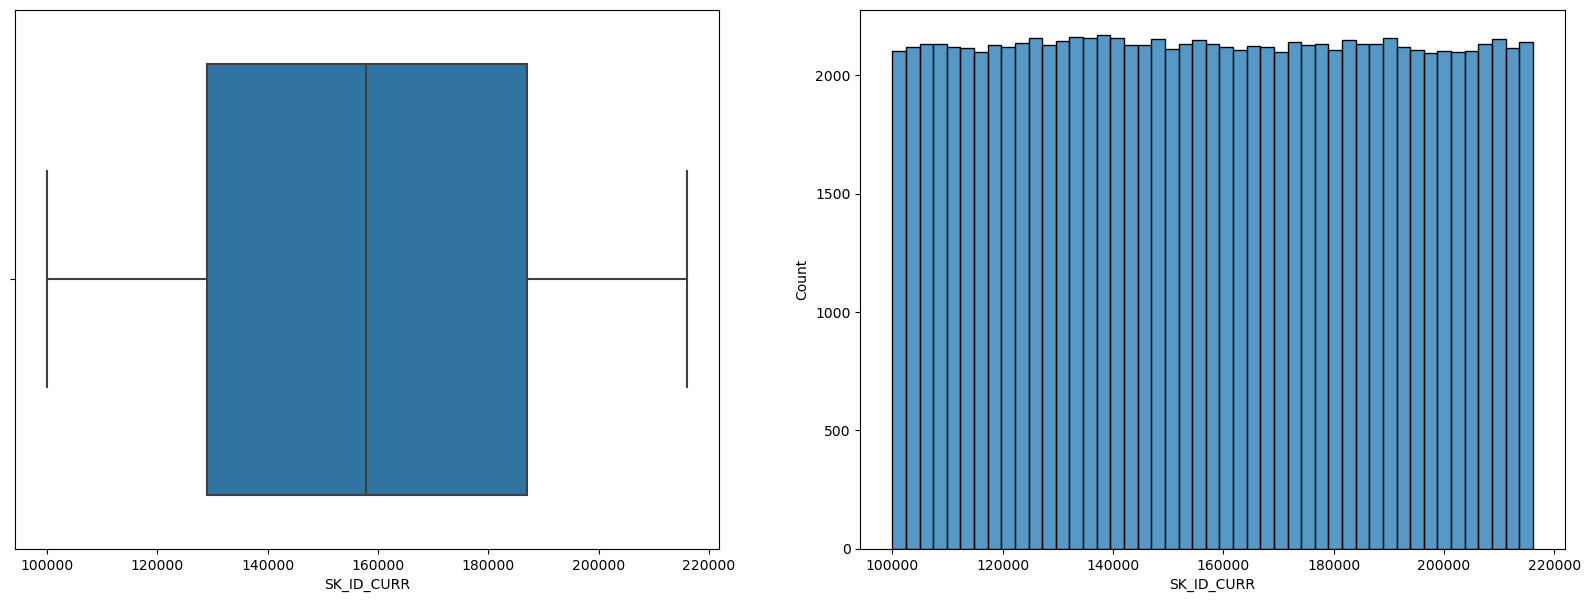

In [36]:
fig,ax= plt.subplots(1,2,figsize = (20,7))
sns.histplot(x=df["SK_ID_CURR"],ax=ax[1])
sns.boxplot(x=df["SK_ID_CURR"],ax=ax[0])
plt.show()

#### There is no outlier present in the data 

#### 2) Visalize TARGET column

In [37]:
info_of_numeric("TARGET")

The mean of column TARGET is 0.08093
The median of column TARGET is 0.0
The mode of column TARGET is 0
The std of column TARGET is 0.2727289476951945
Number of missing values in column TARGET is 0


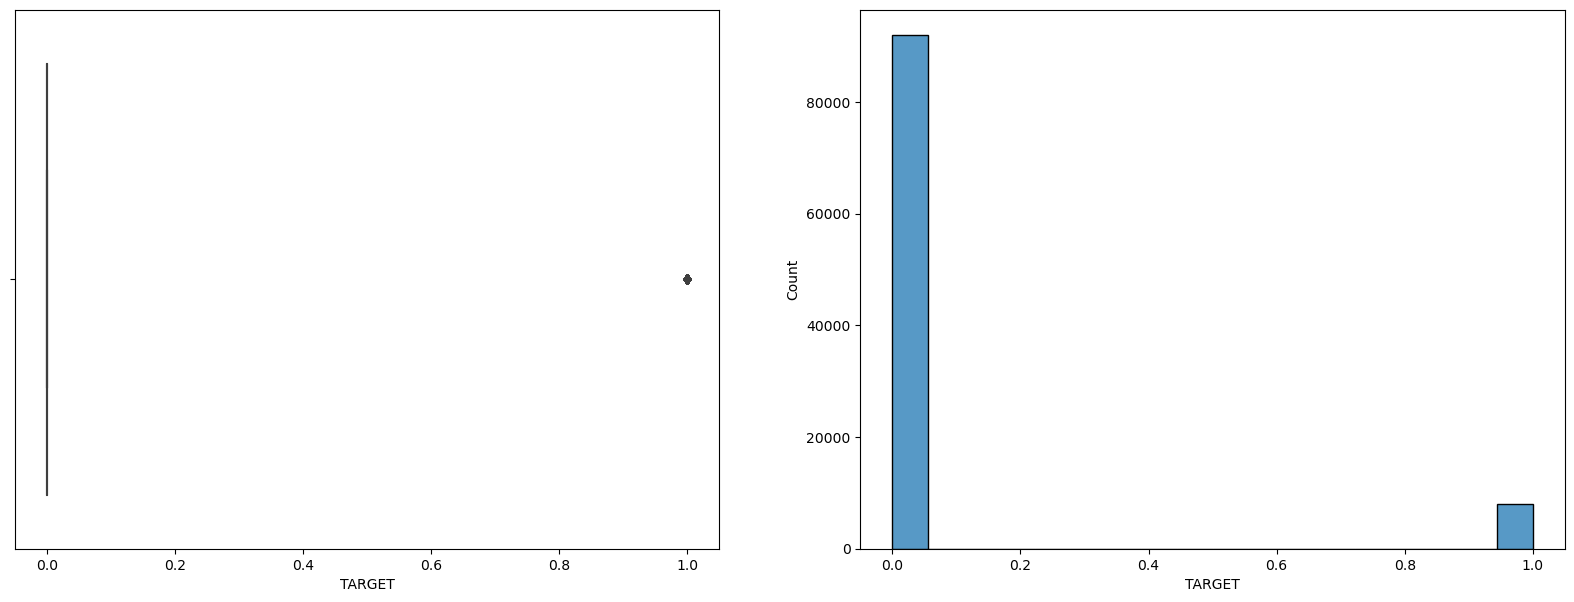

In [38]:
fig,ax= plt.subplots(1,2,figsize = (20,7))
sns.histplot(x=df["TARGET"],ax=ax[1])
sns.boxplot(x=df["TARGET"],ax=ax[0])
plt.show()

In [39]:
t = df["TARGET"].mean()

In [40]:
t

0.08093

In [41]:
x= df[df["TARGET"]>t].index
x

Int64Index([    0,    26,    40,    42,    81,    94,   110,   138,   154,
              163,
            ...
            99801, 99820, 99857, 99884, 99920, 99924, 99932, 99935, 99965,
            99967],
           dtype='int64', length=8093)

In [42]:
for index in x:
    df.loc[x,"TARGET"] = t

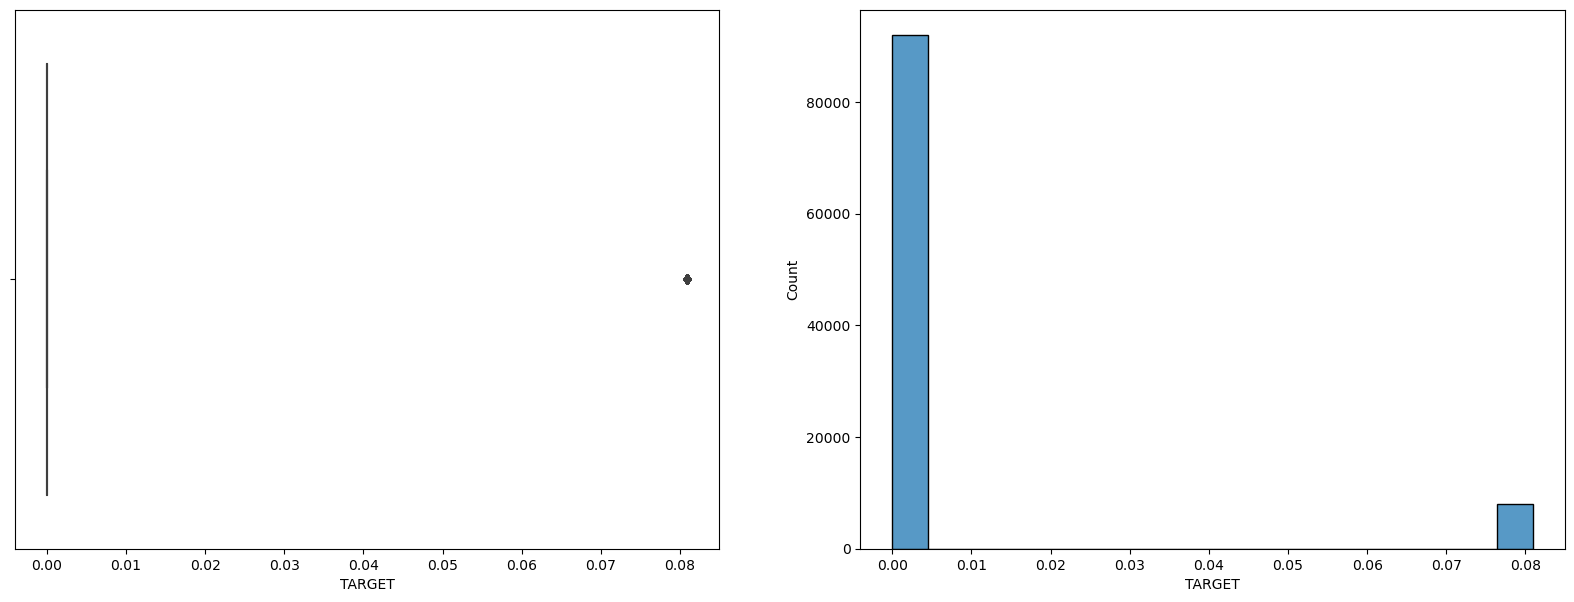

In [43]:
fig,ax= plt.subplots(1,2,figsize = (20,7))
sns.histplot(x=df["TARGET"],ax=ax[1])
sns.boxplot(x=df["TARGET"],ax=ax[0])
plt.show()

here in this there are some outliers are present in the data 

#### 3) Visulize CNT_CHILDREN Column

In [44]:
info_of_numeric("CNT_CHILDREN")

The mean of column CNT_CHILDREN is 0.41739
The median of column CNT_CHILDREN is 0.0
The mode of column CNT_CHILDREN is 0
The std of column CNT_CHILDREN is 0.7210137214425809
Number of missing values in column CNT_CHILDREN is 0


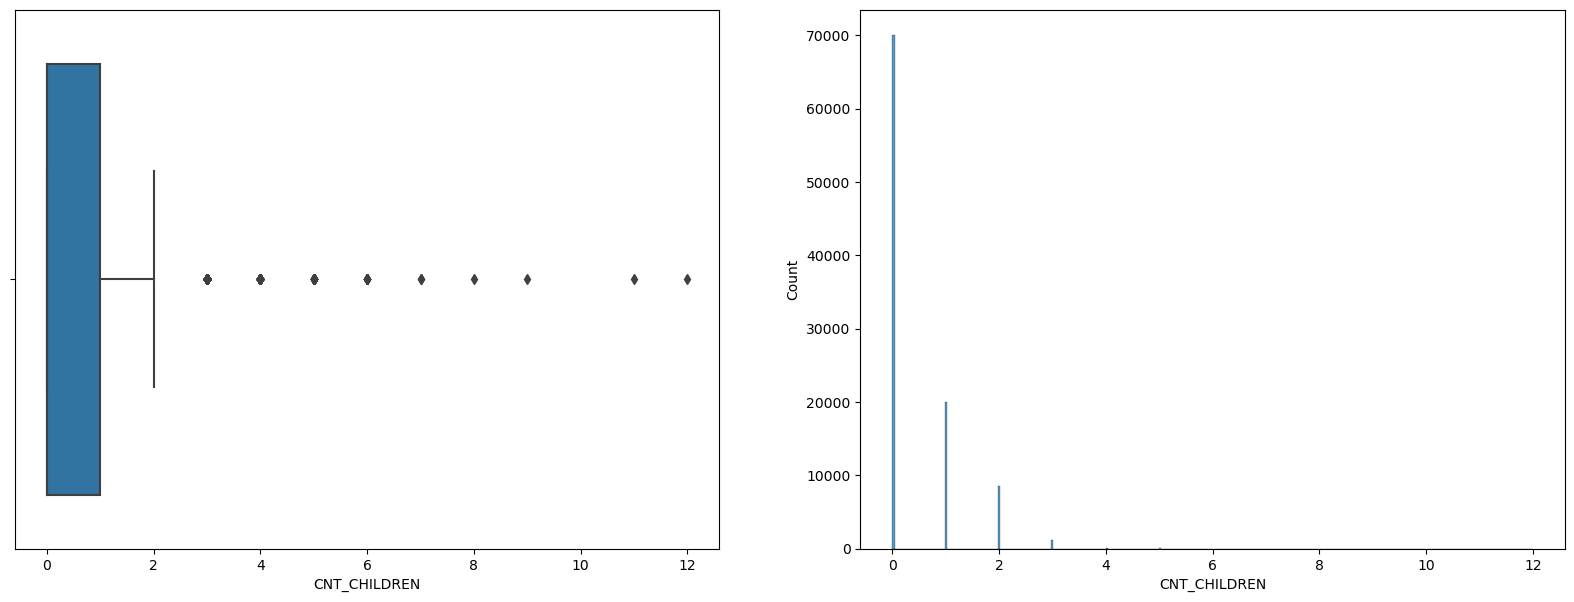

In [45]:
fig,ax= plt.subplots(1,2,figsize = (20,7))
sns.histplot(x=df["CNT_CHILDREN"],ax=ax[1])
sns.boxplot(x=df["CNT_CHILDREN"],ax=ax[0])
plt.show()

In [46]:
c = df["CNT_CHILDREN"].mean()
c

0.41739

In [47]:
a = df[df["CNT_CHILDREN"]>c].index
a

Int64Index([    6,    10,    13,    17,    19,    21,    22,    24,    27,
               33,
            ...
            99955, 99961, 99970, 99979, 99987, 99988, 99990, 99991, 99995,
            99996],
           dtype='int64', length=30034)

In [48]:
for index in a:
    df.loc[a,"CNT_CHILDREN"] = c

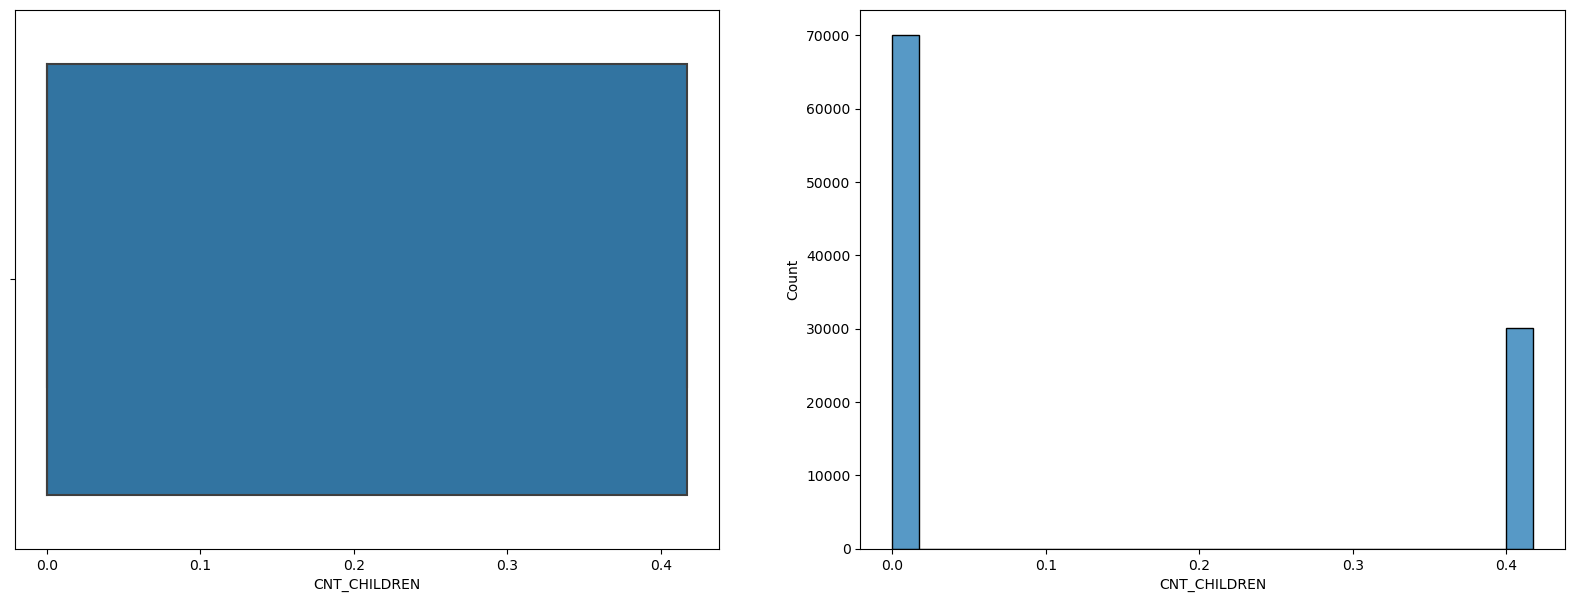

In [49]:
fig,ax= plt.subplots(1,2,figsize = (20,7))
sns.histplot(x=df["CNT_CHILDREN"],ax=ax[1])
sns.boxplot(x=df["CNT_CHILDREN"],ax=ax[0])
plt.show()

There are some outliers preset in the data . i have treated with the outliers by using mean value 

#### 4) Visulize AMT_INCOME_TOTAL   column

In [50]:
info_of_numeric("AMT_INCOME_TOTAL")

The mean of column AMT_INCOME_TOTAL is 169426.07027325002
The median of column AMT_INCOME_TOTAL is 144000.0
The mode of column AMT_INCOME_TOTAL is 135000.0
The std of column AMT_INCOME_TOTAL is 383500.74427718896
Number of missing values in column AMT_INCOME_TOTAL is 0


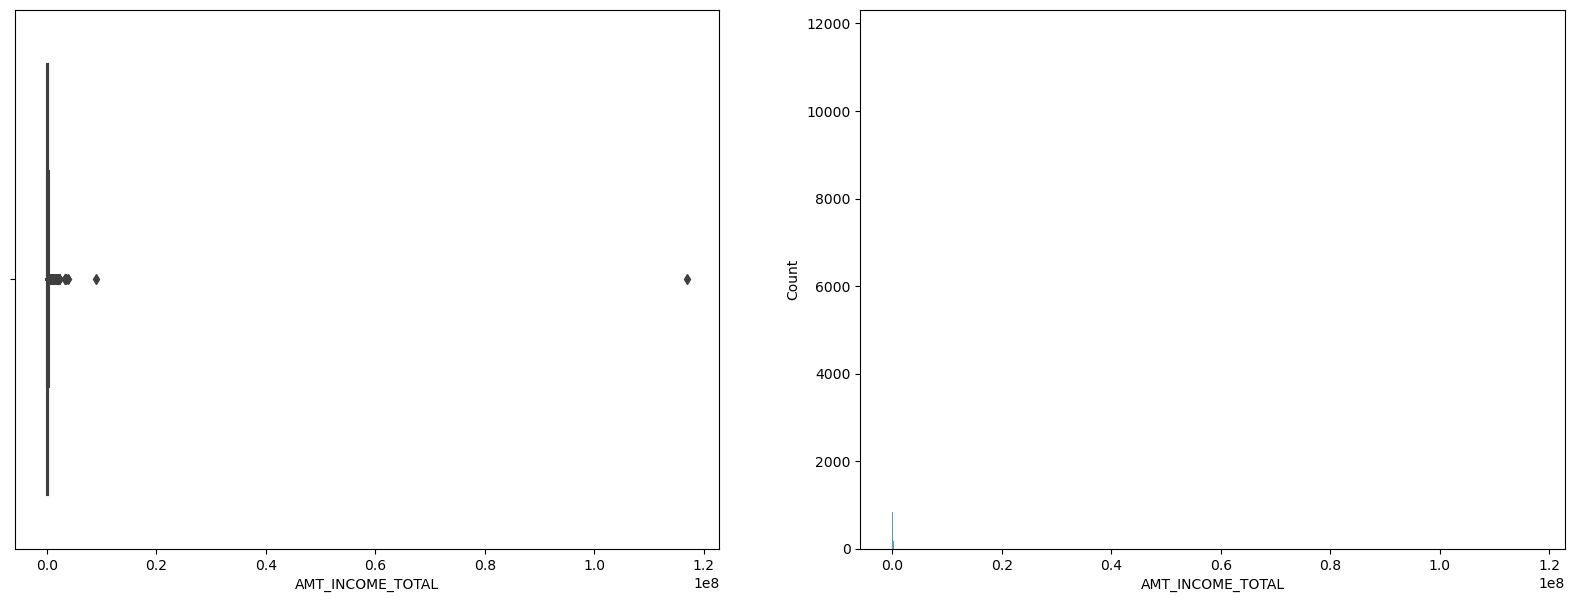

In [51]:
fig,ax= plt.subplots(1,2,figsize = (20,7))
sns.histplot(x=df["AMT_INCOME_TOTAL"],ax=ax[1])
sns.boxplot(x=df["AMT_INCOME_TOTAL"],ax=ax[0])
plt.show()

In [52]:
A = df["AMT_INCOME_TOTAL"].mean()
A

169426.07027325002

In [53]:
q = df[df["AMT_INCOME_TOTAL"]>A].index
q

Int64Index([    0,     1,     6,     7,    13,    14,    21,    22,    28,
               30,
            ...
            99976, 99978, 99980, 99983, 99984, 99989, 99991, 99994, 99996,
            99999],
           dtype='int64', length=39084)

In [54]:
for index in q:
    df.loc[q,"CNT_CHILDREN"] = A

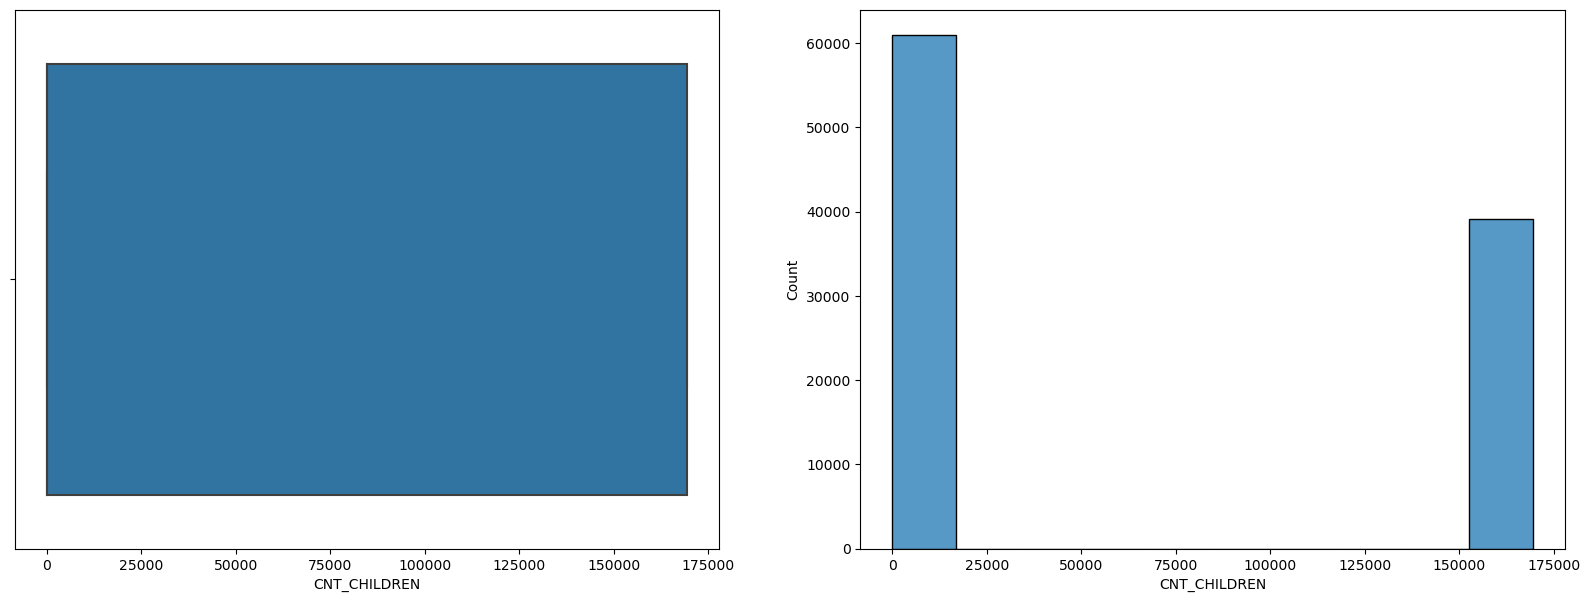

In [55]:
fig,ax= plt.subplots(1,2,figsize = (20,7))
sns.histplot(x=df["CNT_CHILDREN"],ax=ax[1],bins=10)
sns.boxplot(x=df["CNT_CHILDREN"],ax=ax[0])
plt.show()

There are some outliers are present in the data and then i treated it with mean value of the column

#### 5) visualize AMT_CREDIT column

In [56]:
info_of_numeric("AMT_CREDIT")

The mean of column AMT_CREDIT is 599003.4465
The median of column AMT_CREDIT is 513040.5
The mode of column AMT_CREDIT is 450000.0
The std of column AMT_CREDIT is 402051.9591213264
Number of missing values in column AMT_CREDIT is 0


In [57]:
b = df["AMT_CREDIT"].mean()
b

599003.4465

In [58]:
s = df[df["AMT_CREDIT"]>b].index
s

Int64Index([    1,     6,     7,     8,    10,    13,    14,    21,    26,
               28,
            ...
            99977, 99979, 99980, 99983, 99987, 99988, 99989, 99994, 99995,
            99997],
           dtype='int64', length=40450)

In [59]:
for index in s:
    df.loc[s,"AMT_CREDIT"]= b

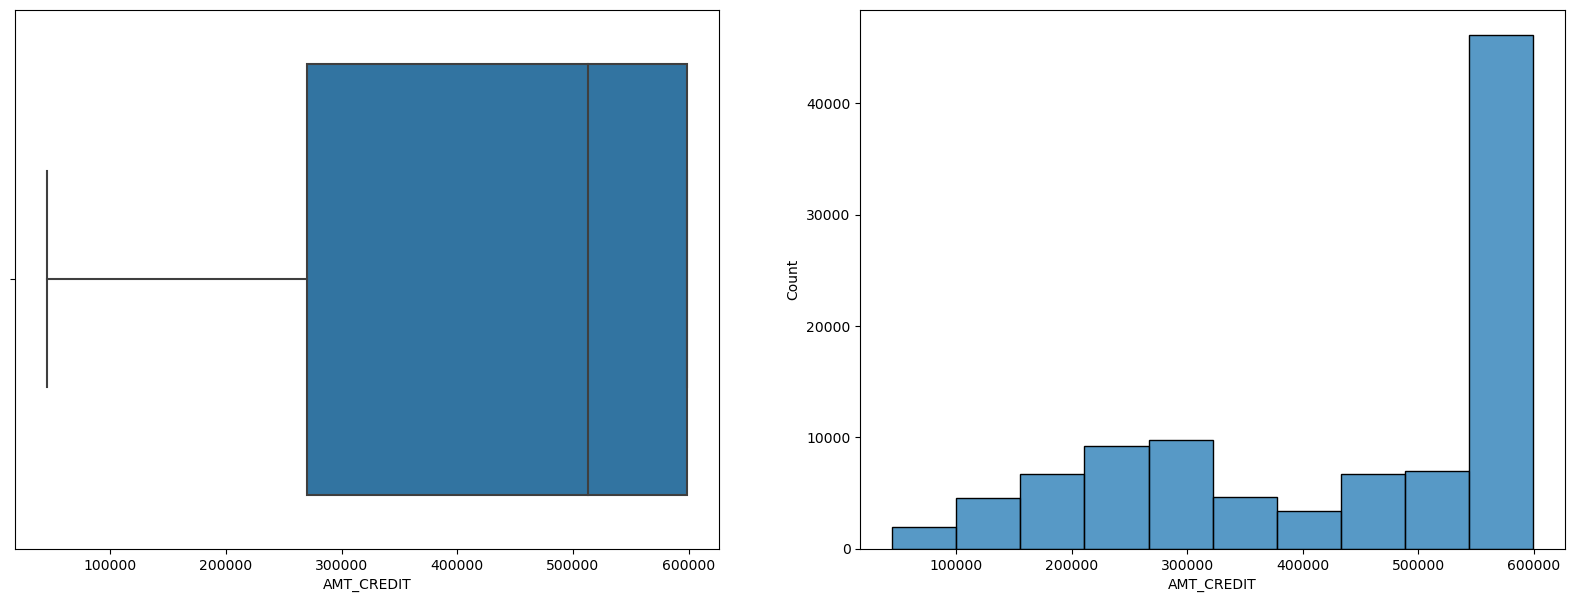

In [60]:
fig,ax= plt.subplots(1,2,figsize = (20,7))
sns.histplot(x=df["AMT_CREDIT"],ax=ax[1],bins=10)
sns.boxplot(x=df["AMT_CREDIT"],ax=ax[0])
plt.show()

There are some outliers are present in the data and then i treated it with mean value of the column

#### 6) Visualize AMT_GOODS_PRICE columns

In [61]:
info_of_numeric("AMT_GOODS_PRICE")

The mean of column AMT_GOODS_PRICE is 538345.1489706662
The median of column AMT_GOODS_PRICE is 450000.0
The mode of column AMT_GOODS_PRICE is 450000.0
The std of column AMT_GOODS_PRICE is 369397.7246421765
Number of missing values in column AMT_GOODS_PRICE is 81


In [62]:
df["AMT_GOODS_PRICE"].fillna(450000.0,inplace=True)

In [63]:
f= df["AMT_GOODS_PRICE"].mean()
f

538273.5894

In [64]:
g = df[df["AMT_GOODS_PRICE"]>f].index
g

Int64Index([    1,     6,     7,     8,    10,    13,    14,    21,    26,
               28,
            ...
            99977, 99979, 99980, 99983, 99986, 99988, 99989, 99994, 99995,
            99997],
           dtype='int64', length=39742)

In [65]:
for index in g:
    df.loc[g,"AMT_GOODS_PRICE"] = f

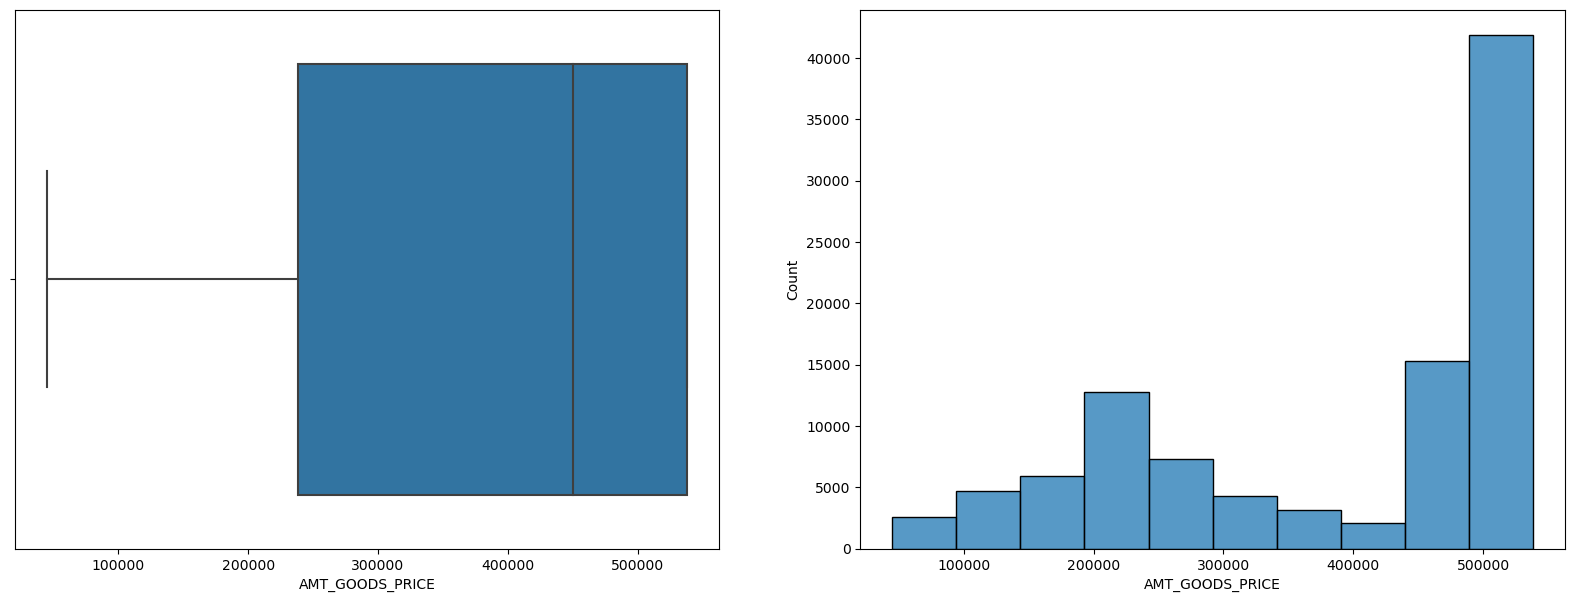

In [66]:
fig,ax= plt.subplots(1,2,figsize = (20,7))
sns.histplot(x=df["AMT_GOODS_PRICE"],ax=ax[1],bins=10)
sns.boxplot(x=df["AMT_GOODS_PRICE"],ax=ax[0])
plt.show()

#### 7) Visualize DAYS_EMPLOYED column

In [67]:
info_of_numeric("DAYS_EMPLOYED")

The mean of column DAYS_EMPLOYED is 63292.22206
The median of column DAYS_EMPLOYED is -1219.0
The mode of column DAYS_EMPLOYED is 365243
The std of column DAYS_EMPLOYED is 140839.69729599176
Number of missing values in column DAYS_EMPLOYED is 0


In [68]:
q = df["DAYS_EMPLOYED"].mean()
q

63292.22206

In [69]:
a = df[df["DAYS_EMPLOYED"]>q].index
a

Int64Index([    8,    11,    23,    38,    43,    46,    54,    56,    62,
               79,
            ...
            99917, 99922, 99927, 99936, 99941, 99950, 99963, 99976, 99981,
            99982],
           dtype='int64', length=17865)

In [70]:
for index in a:
    df.loc[a,"DAYS_EMPLOYED"] = q

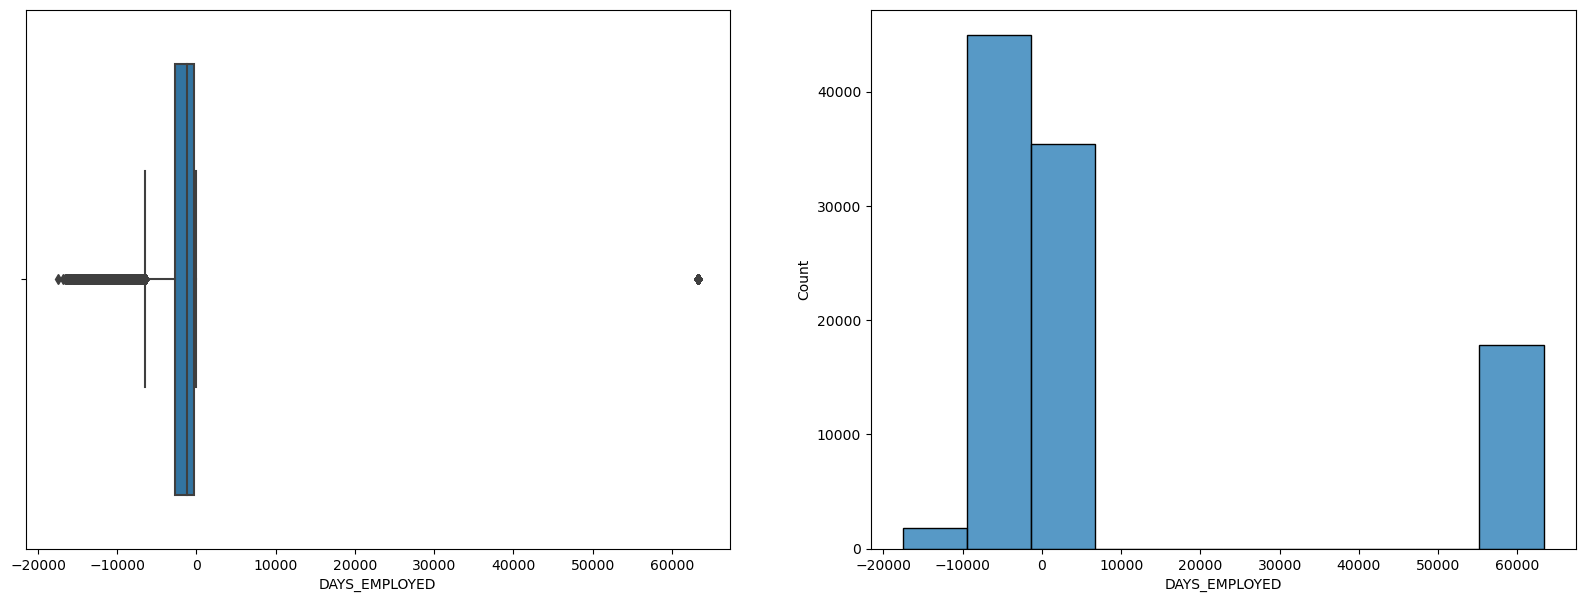

In [71]:
fig,ax= plt.subplots(1,2,figsize = (20,7))
sns.histplot(x=df["DAYS_EMPLOYED"],ax=ax[1],bins=10)
sns.boxplot(x=df["DAYS_EMPLOYED"],ax=ax[0])
plt.show()

#### 8) Visualize MOBILE column

In [72]:
info_of_numeric("MOBILE")

The mean of column MOBILE is 0.99999
The median of column MOBILE is 1.0
The mode of column MOBILE is 1
The std of column MOBILE is 0.0031622776601694822
Number of missing values in column MOBILE is 0


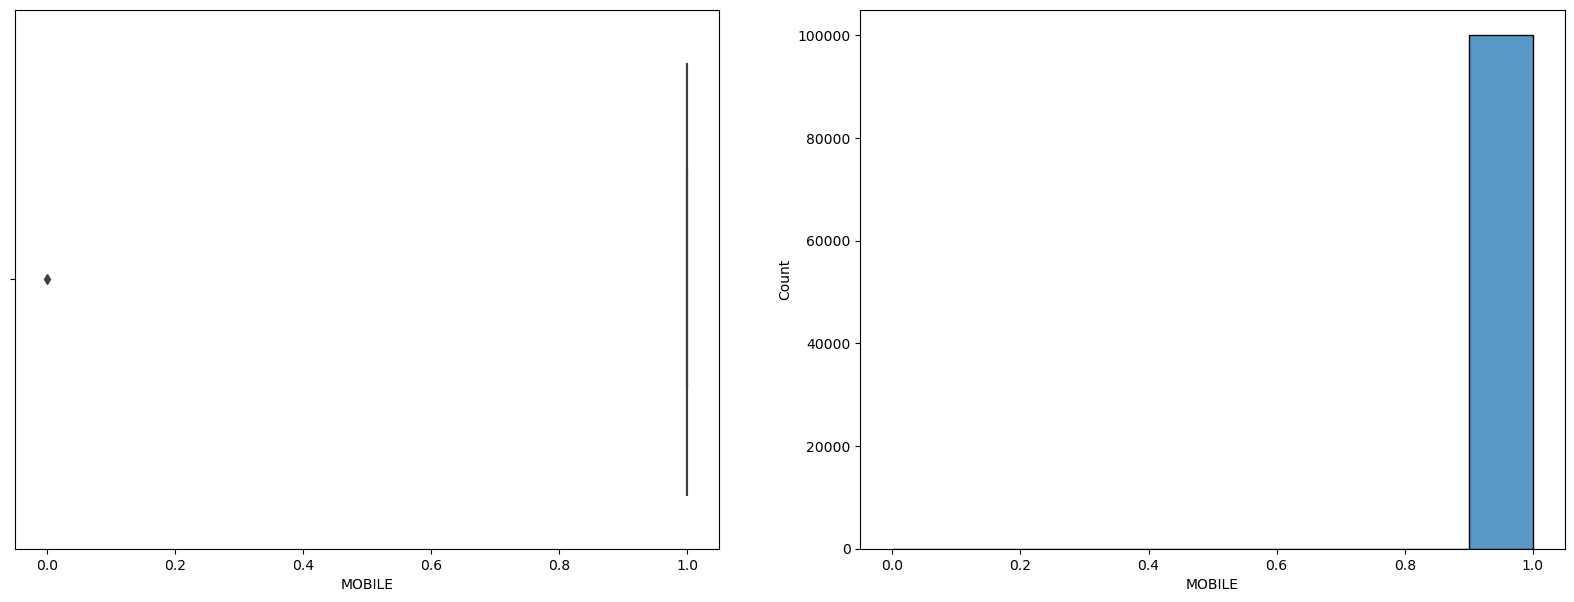

In [73]:
fig,ax= plt.subplots(1,2,figsize = (20,7))
sns.histplot(x=df["MOBILE"],ax=ax[1],bins=10)
sns.boxplot(x=df["MOBILE"],ax=ax[0])
plt.show()

#### 9) Visualize WORK_PHONE column

In [74]:
info_of_numeric("WORK_PHONE")

The mean of column WORK_PHONE is 0.82128
The median of column WORK_PHONE is 1.0
The mode of column WORK_PHONE is 1
The std of column WORK_PHONE is 0.38311960196059996
Number of missing values in column WORK_PHONE is 0


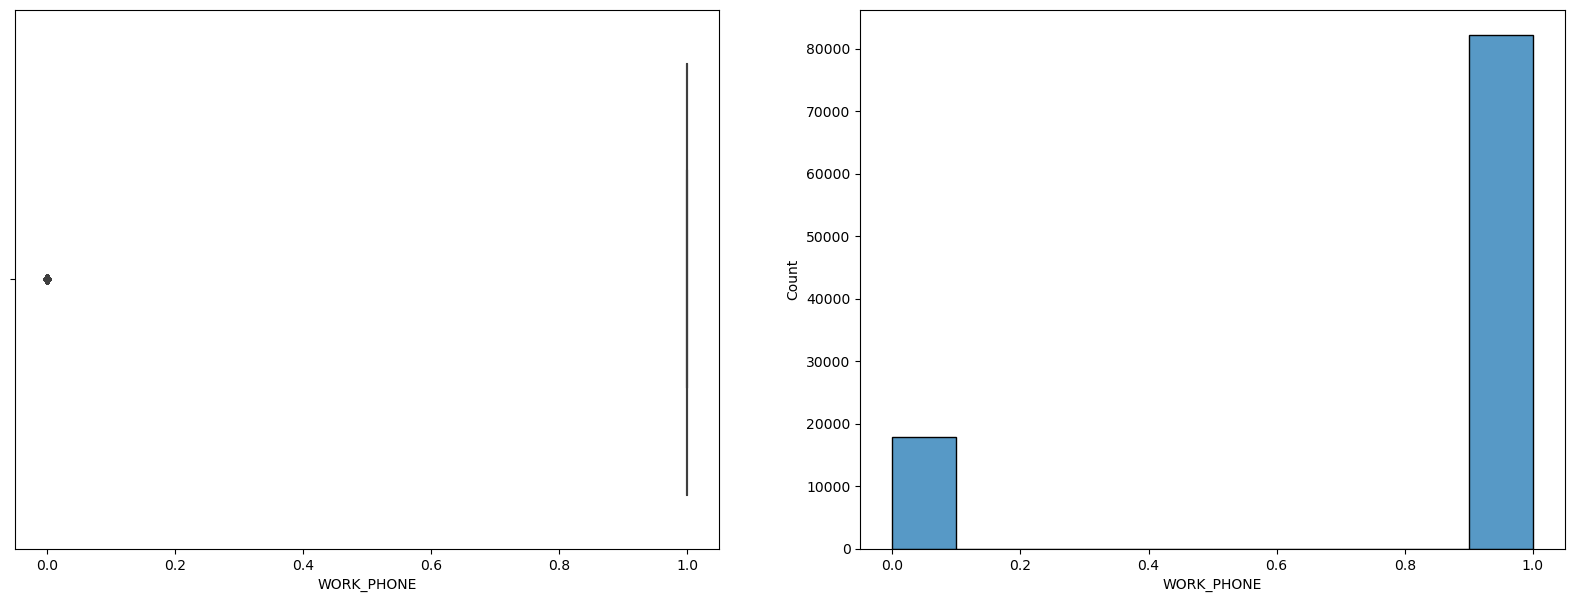

In [75]:
fig,ax= plt.subplots(1,2,figsize = (20,7))
sns.histplot(x=df["WORK_PHONE"],ax=ax[1],bins=10)
sns.boxplot(x=df["WORK_PHONE"],ax=ax[0])
plt.show()

#### 10) Visualize HOME_PHONE column

In [76]:
info_of_numeric("HOME_PHONE")

The mean of column HOME_PHONE is 0.19974
The median of column HOME_PHONE is 0.0
The mode of column HOME_PHONE is 0
The std of column HOME_PHONE is 0.39980686694330536
Number of missing values in column HOME_PHONE is 0


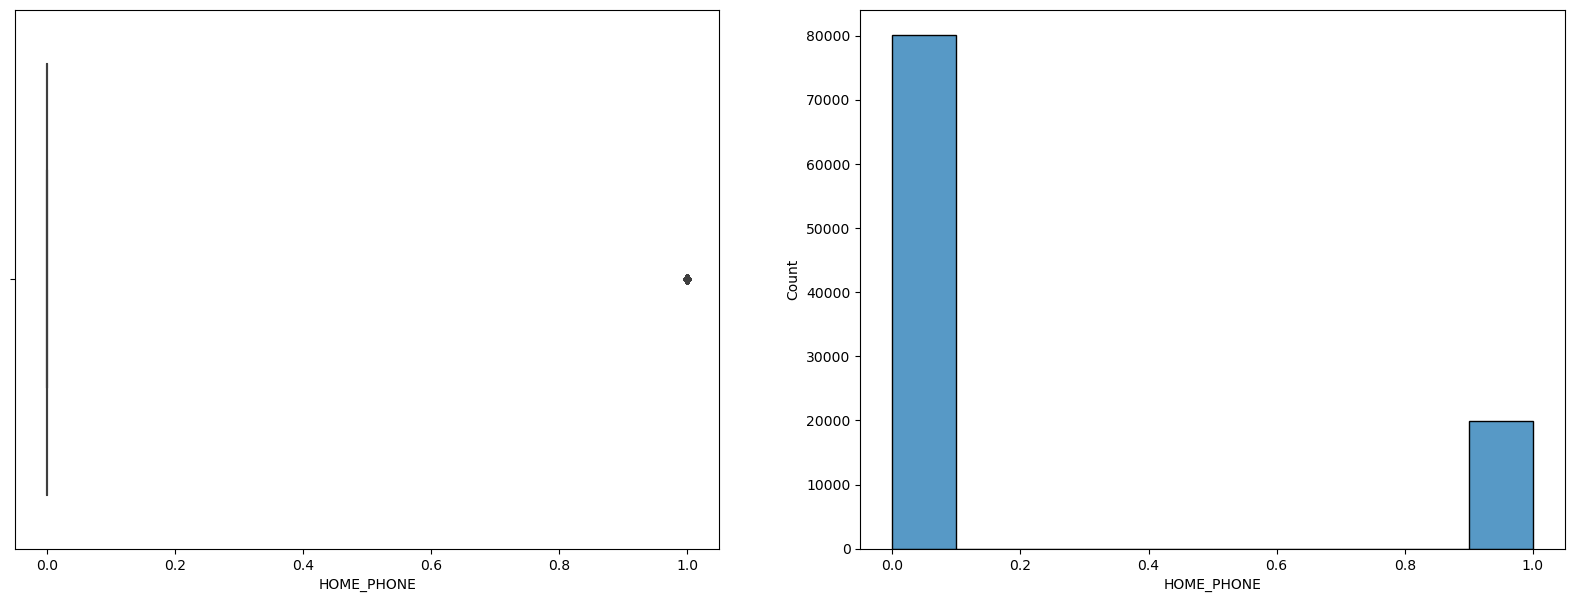

In [77]:
fig,ax= plt.subplots(1,2,figsize = (20,7))
sns.histplot(x=df["HOME_PHONE"],ax=ax[1],bins=10)
sns.boxplot(x=df["HOME_PHONE"],ax=ax[0])
plt.show()

#### 11) Visualize MOBILE_REACHABLE column

In [78]:
info_of_numeric("MOBILE_REACHABLE")

The mean of column MOBILE_REACHABLE is 0.99799
The median of column MOBILE_REACHABLE is 1.0
The mode of column MOBILE_REACHABLE is 1
The std of column MOBILE_REACHABLE is 0.04478816763165192
Number of missing values in column MOBILE_REACHABLE is 0


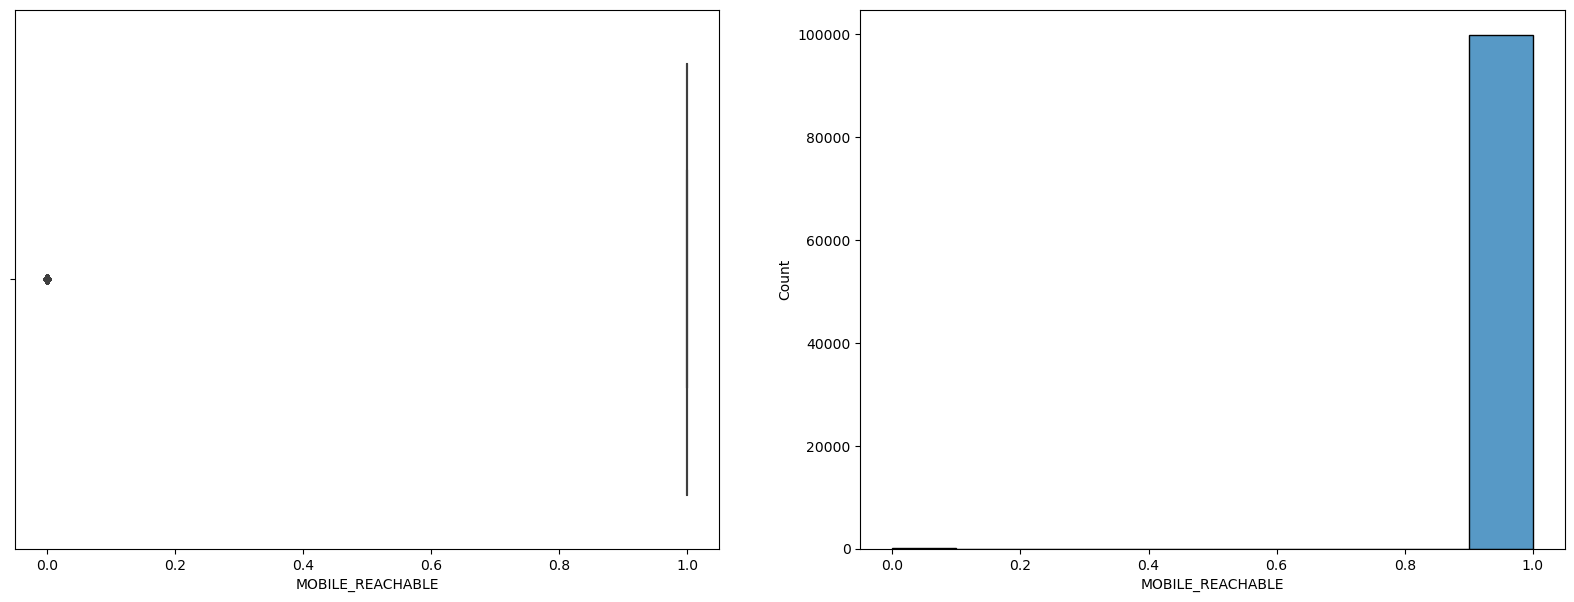

In [79]:
fig,ax= plt.subplots(1,2,figsize = (20,7))
sns.histplot(x=df["MOBILE_REACHABLE"],ax=ax[1],bins=10)
sns.boxplot(x=df["MOBILE_REACHABLE"],ax=ax[0])
plt.show()

#### 12) Visualize FLAG_EMAIL column 

In [80]:
info_of_numeric("FLAG_EMAIL")

The mean of column FLAG_EMAIL is 0.05619
The median of column FLAG_EMAIL is 0.0
The mode of column FLAG_EMAIL is 0
The std of column FLAG_EMAIL is 0.23028941406895756
Number of missing values in column FLAG_EMAIL is 0


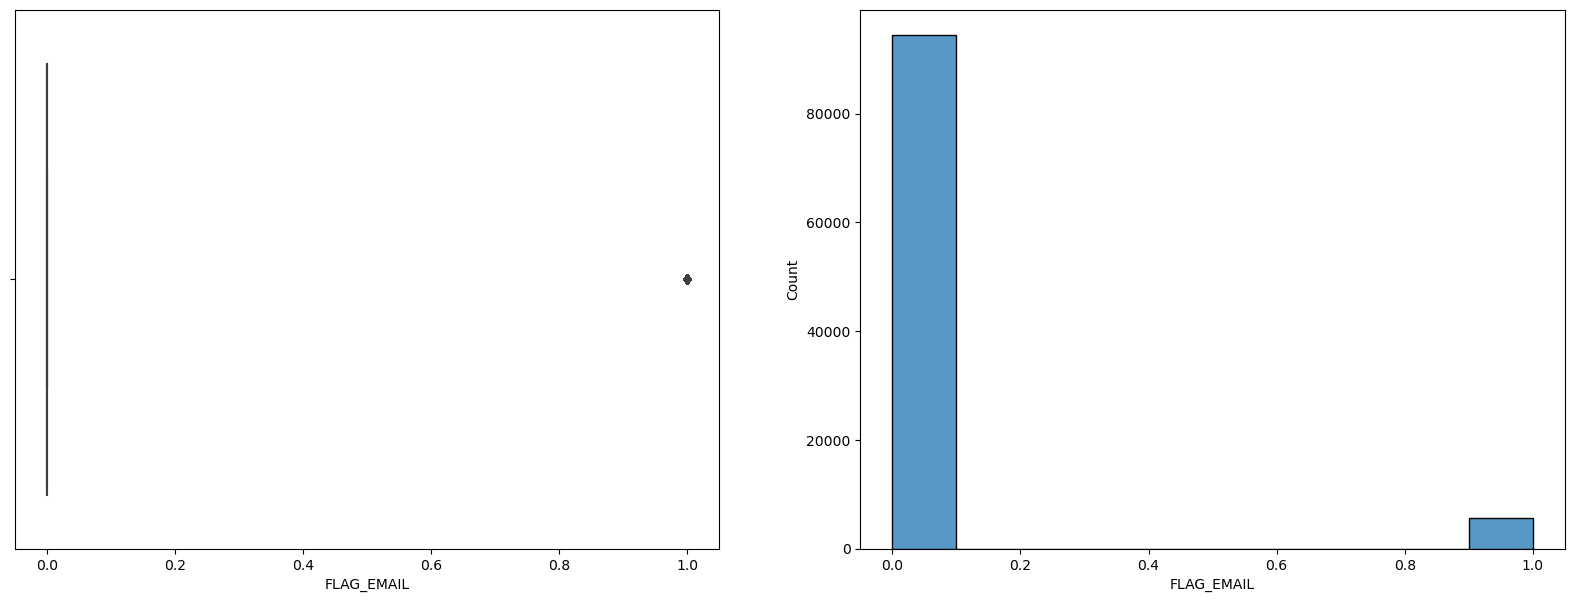

In [81]:
fig,ax= plt.subplots(1,2,figsize = (20,7))
sns.histplot(x=df["FLAG_EMAIL"],ax=ax[1],bins=10)
sns.boxplot(x=df["FLAG_EMAIL"],ax=ax[0])
plt.show()

#### 13) Visualize CNT_FAM_MEMBERS column

In [82]:
info_of_numeric("CNT_FAM_MEMBERS")

The mean of column CNT_FAM_MEMBERS is 2.1556715567155673
The median of column CNT_FAM_MEMBERS is 2.0
The mode of column CNT_FAM_MEMBERS is 2.0
The std of column CNT_FAM_MEMBERS is 0.9088966556371371
Number of missing values in column CNT_FAM_MEMBERS is 1


In [83]:
df["CNT_FAM_MEMBERS"].fillna(2.0,inplace=True)

In [84]:
w = df["CNT_FAM_MEMBERS"].mean()
w

2.15567

In [85]:
s = df[df["CNT_FAM_MEMBERS"]>w].index
s

Int64Index([    6,    10,    13,    17,    21,    22,    24,    27,    33,
               36,
            ...
            99930, 99931, 99933, 99970, 99979, 99988, 99990, 99991, 99995,
            99996],
           dtype='int64', length=26468)

In [86]:
for index in s:
    df.loc[s,"CNT_FAM_MEMBERS"] = w

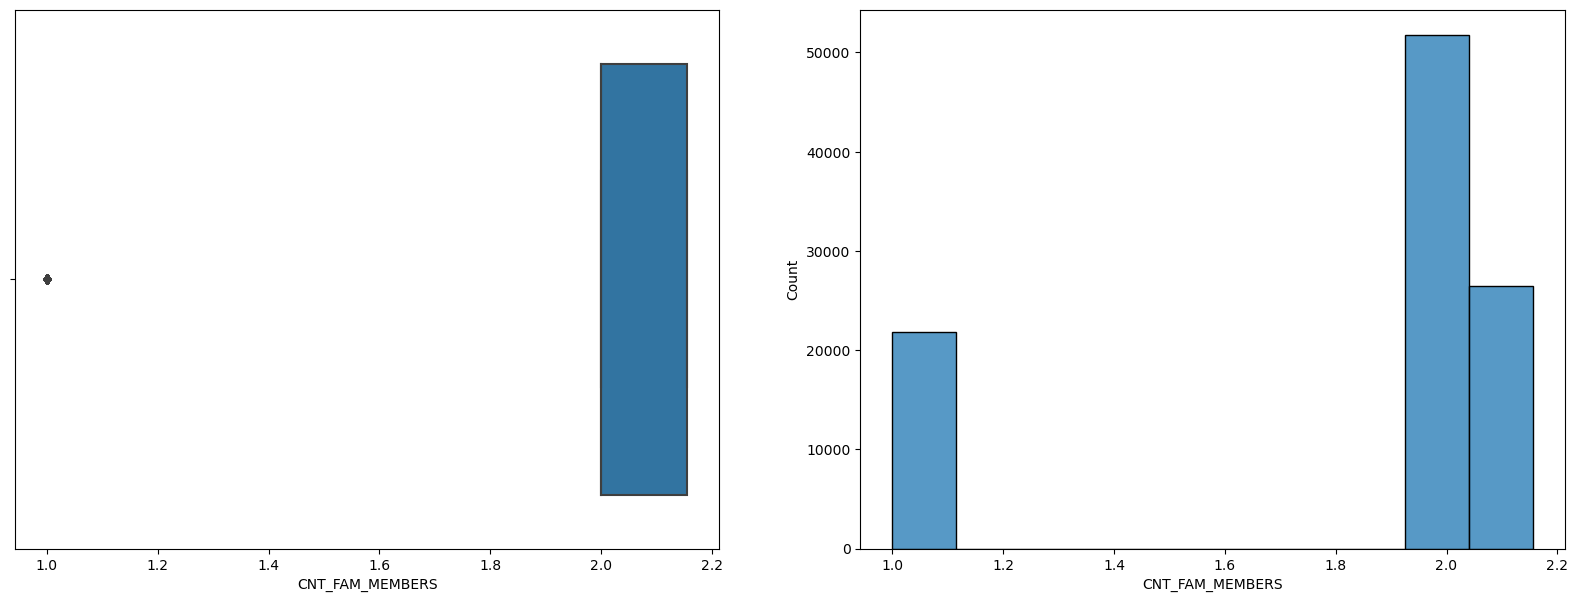

In [87]:
fig,ax= plt.subplots(1,2,figsize = (20,7))
sns.histplot(x=df["CNT_FAM_MEMBERS"],ax=ax[1],bins=10)
sns.boxplot(x=df["CNT_FAM_MEMBERS"],ax=ax[0])
plt.show()

#### 14) Visualize TOTAL_DOC_SUBMITTED column

In [88]:
info_of_numeric("TOTAL_DOC_SUBMITTED")

The mean of column TOTAL_DOC_SUBMITTED is 0.93121
The median of column TOTAL_DOC_SUBMITTED is 1.0
The mode of column TOTAL_DOC_SUBMITTED is 1
The std of column TOTAL_DOC_SUBMITTED is 0.3439173137416586
Number of missing values in column TOTAL_DOC_SUBMITTED is 0


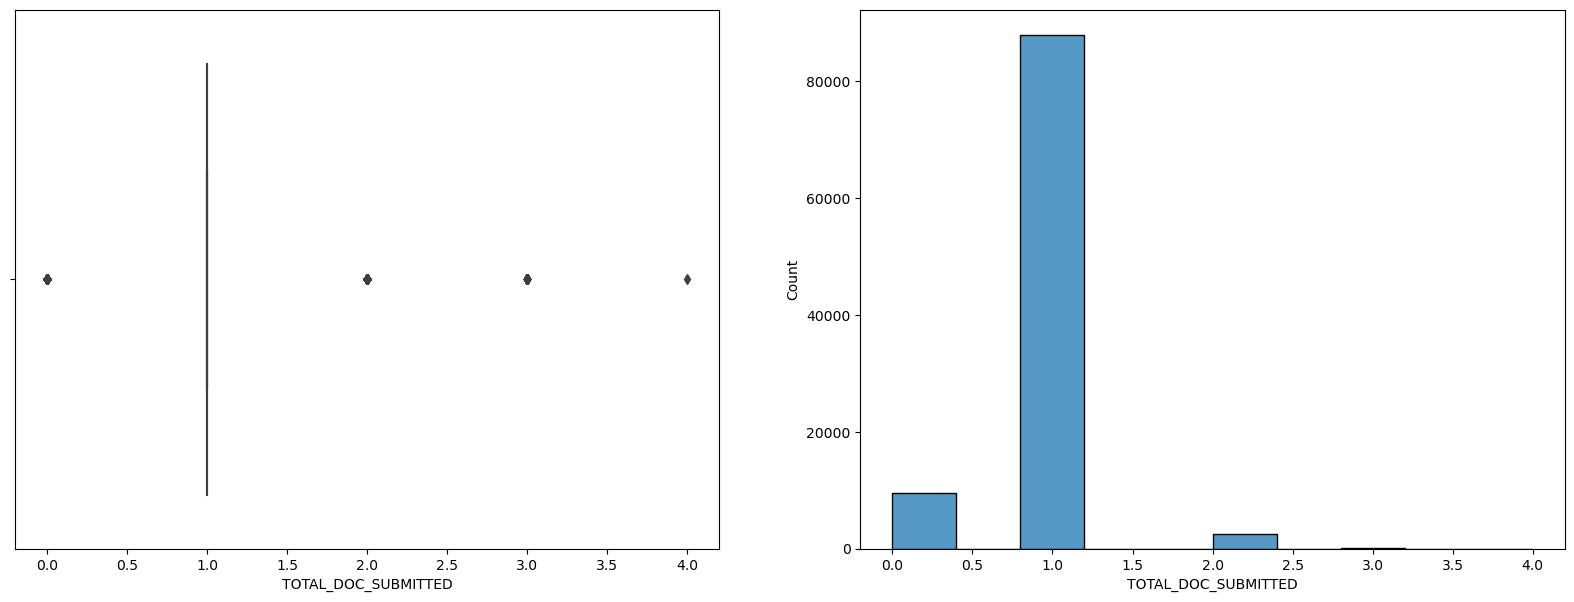

In [89]:
fig,ax= plt.subplots(1,2,figsize = (20,7))
sns.histplot(x=df["TOTAL_DOC_SUBMITTED"],ax=ax[1],bins=10)
sns.boxplot(x=df["TOTAL_DOC_SUBMITTED"],ax=ax[0])
plt.show()

Here i have visualized all the numerical columns with the help of HIstogram and Boxplot in Uni-variant Analysis

### Finding the Relationship between two columns 

## Bi-varinat and Multi-Variant Analysis

- Find the columns which has the high relation 
- Draw a Suitable graph according to their data types

In [90]:
df.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,CNT_FAM_MEMBERS,TOTAL_DOC_SUBMITTED
SK_ID_CURR,1.000000,0.003054,-0.002328,-0.003438,-0.001546,-0.001855,-0.000347,0.003747,0.000821,0.000279,-0.000974,0.004994,-0.000204,0.002248
TARGET,0.003054,1.000000,-0.023375,0.004131,0.001866,-0.009417,-0.038522,0.000938,0.044348,0.026184,0.002675,-0.002348,-0.005818,0.014576
CNT_CHILDREN,-0.002328,-0.023375,1.000000,0.179401,0.307908,0.314647,-0.142339,0.002533,0.140052,-0.045245,-0.008896,0.081329,0.037925,0.045742
AMT_INCOME_TOTAL,-0.003438,0.004131,0.179401,1.000000,0.082377,0.083193,-0.040789,0.000358,0.040384,-0.012115,-0.006865,0.023179,0.012338,0.008671
AMT_CREDIT,-0.001546,0.001866,0.307908,0.082377,1.000000,0.982512,-0.072964,0.002983,0.067059,-0.042624,0.026477,0.011969,0.103347,0.234658
AMT_GOODS_PRICE,-0.001855,-0.009417,0.314647,0.083193,0.982512,1.000000,-0.071375,0.002932,0.065167,-0.023541,0.021952,0.010255,0.105537,0.191014
DAYS_EMPLOYED,-0.000347,-0.038522,-0.142339,-0.040789,-0.072964,-0.071375,1.000000,0.001208,-0.996218,-0.233042,0.014913,-0.060940,-0.162213,0.010329
MOBILE,0.003747,0.000938,0.002533,0.000358,0.002983,0.002932,0.001208,1.000000,-0.001475,0.001580,-0.000142,0.000772,-0.001273,-0.009827
WORK_PHONE,0.000821,0.044348,0.140052,0.040384,0.067059,0.065167,-0.996218,-0.001475,1.000000,0.232989,-0.015107,0.063611,0.161429,-0.013161
HOME_PHONE,0.000279,0.026184,-0.045245,-0.012115,-0.042624,-0.023541,-0.233042,0.001580,0.232989,1.000000,0.022421,-0.006228,0.056213,0.025092


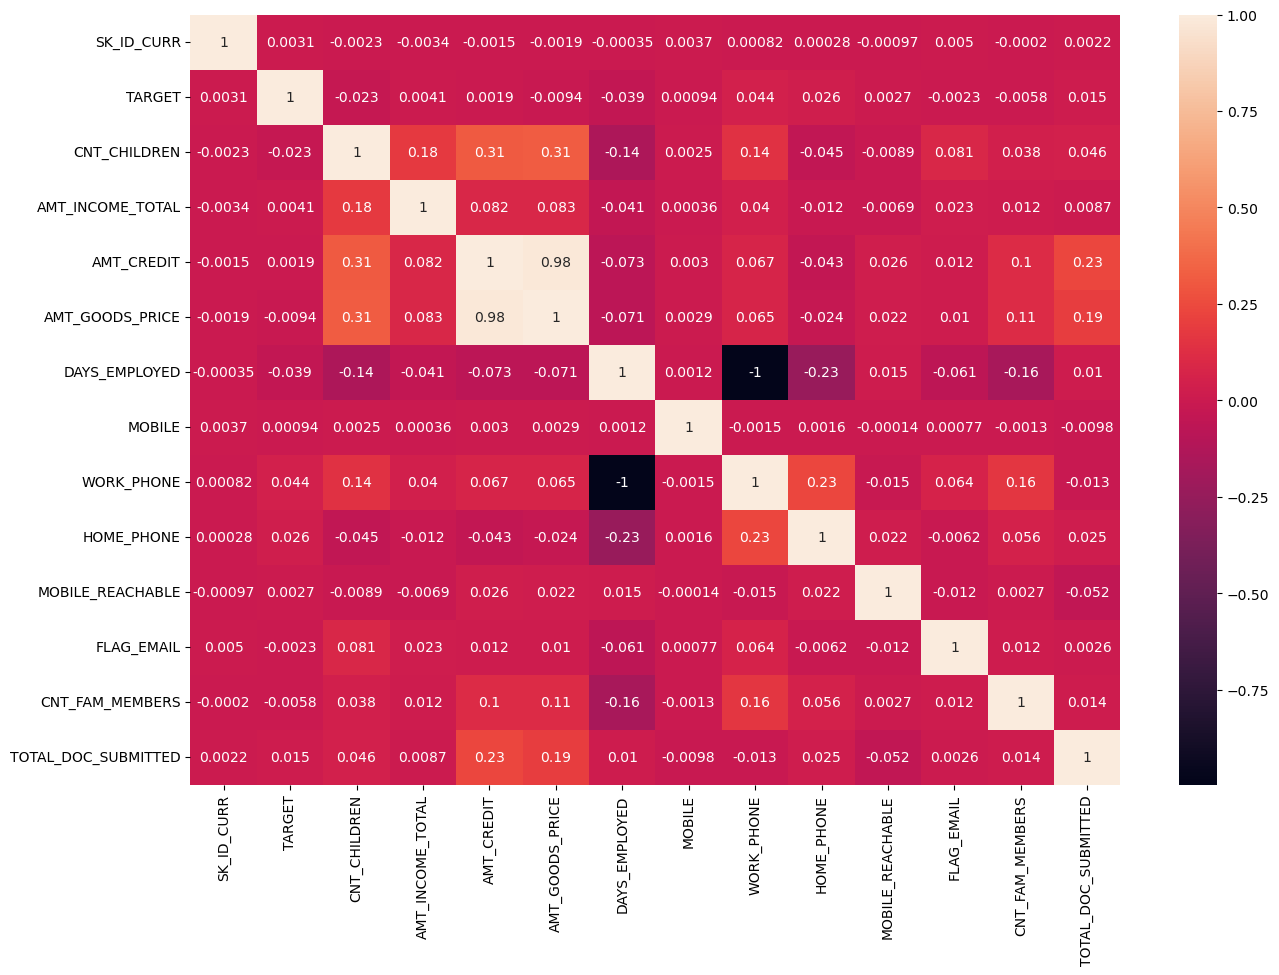

In [96]:
sns.heatmap(df.corr(),annot = True)
plt.rcParams["figure.figsize"] = (15,10)

plt.show()

### Bi- variant Analysis for AMT_Credit and AMT_goods_price columns by using scatter plot

In [92]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,0.08093,Cash loans,M,N,Y,169426.070273,202500.0,406597.5000,351000.0000,...,-637.0,1,1,0,1,0,Laborers,1.00000,WEDNESDAY,1
1,100003,0.00000,Cash loans,F,N,N,169426.070273,270000.0,599003.4465,538273.5894,...,-1188.0,1,1,0,1,0,Core staff,2.00000,MONDAY,1
2,100004,0.00000,Revolving loans,M,Y,Y,0.000000,67500.0,135000.0000,135000.0000,...,-225.0,1,1,1,1,0,Laborers,1.00000,MONDAY,0
3,100006,0.00000,Cash loans,F,N,Y,0.000000,135000.0,312682.5000,297000.0000,...,-3039.0,1,1,0,1,0,Laborers,2.00000,WEDNESDAY,1
4,100007,0.00000,Cash loans,M,N,Y,0.000000,121500.0,513000.0000,513000.0000,...,-3038.0,1,1,0,1,0,Core staff,1.00000,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0.00000,Cash loans,F,N,Y,0.417390,157500.0,599003.4465,538273.5894,...,-232.0,1,1,1,1,0,Sales staff,2.15567,MONDAY,1
99996,216087,0.00000,Cash loans,F,N,Y,169426.070273,225000.0,284400.0000,225000.0000,...,-182.0,1,1,0,1,0,Managers,2.15567,TUESDAY,1
99997,216088,0.00000,Cash loans,F,Y,Y,0.000000,135000.0,599003.4465,538273.5894,...,-4805.0,1,1,0,1,0,Sales staff,2.00000,TUESDAY,1
99998,216089,0.00000,Cash loans,F,Y,N,0.000000,135000.0,225000.0000,225000.0000,...,-340.0,1,1,0,1,0,Sales staff,2.00000,FRIDAY,2


In [93]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE',
       'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')

#### Relation between income type and house

In [94]:
table=pd.pivot_table(data=df,index=['NAME_INCOME_TYPE'],values='SK_ID_CURR',columns='House',aggfunc='count')
table['PERCENT OF HAVING HOME']=table['Y']/(table['N']+table['Y'])*100
table

House,N,Y,PERCENT OF HAVING HOME
NAME_INCOME_TYPE,,,
Businessman,1.0,3.0,75.000000
Commercial associate,7283.0,15934.0,68.630745
Maternity leave,1.0,NaN,NaN
Pensioner,4322.0,13535.0,75.796606
State servant,2443.0,4557.0,65.100000
Student,5.0,4.0,44.444444
Unemployed,3.0,7.0,70.000000
Working,16614.0,35288.0,67.989673


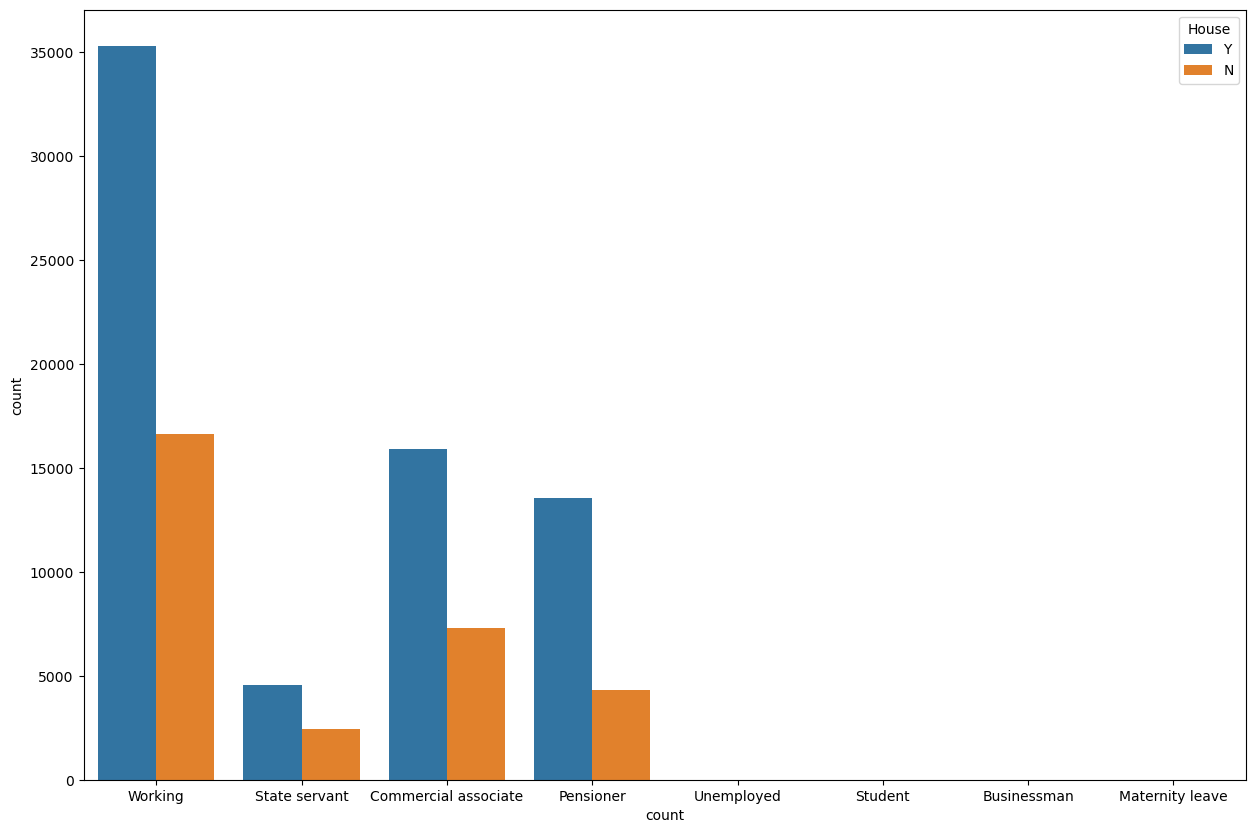

In [95]:
sns.countplot(data=df,x='NAME_INCOME_TYPE',hue='House')
plt.xlabel('count')

plt.show()

#### Here we can see that the Relation between income type and house
- From the above graph we can say that the Working employees has the highest number of houses and then Commercial associate and at third pensioner , the people who are receivig pension amounts and them at last State servant 
- The working employee having the houses is also high at the sametime , not having the houses is also high 

#### Relationship between target and Name contract type

In [102]:
Target_contract =pd.pivot_table(data= df,index=['NAME_CONTRACT_TYPE'],values='SK_ID_CURR',columns='TARGET',aggfunc='count')
Target_contract

TARGET,0.00000,0.08093
NAME_CONTRACT_TYPE,,
Cash loans,82955,7562
Revolving loans,8952,531


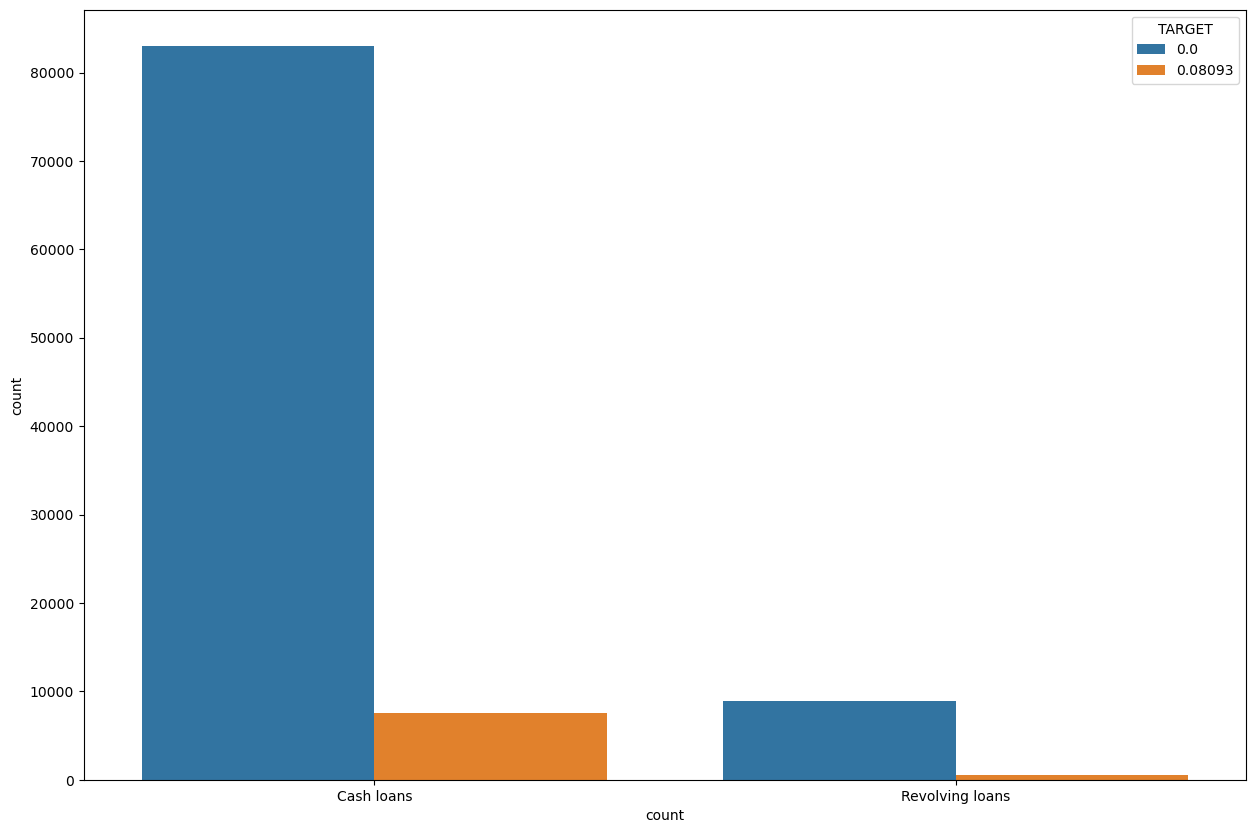

In [103]:
sns.countplot(data=df,x='NAME_CONTRACT_TYPE',hue='TARGET')
plt.xlabel('count')

plt.show()

##### We can clearly see that the maximum distributed loans are cash loans

#### Relationship betweeen Target and name income type

In [105]:
Target_income = pd.pivot_table(data=df,index=['NAME_INCOME_TYPE'],columns='TARGET',aggfunc='count',values='SK_ID_CURR') 
Target_income

TARGET,0.00000,0.08093
NAME_INCOME_TYPE,,
Businessman,4.0,NaN
Commercial associate,21491.0,1726.0
Maternity leave,1.0,NaN
Pensioner,16879.0,978.0
State servant,6593.0,407.0
Student,9.0,NaN
Unemployed,6.0,4.0
Working,46924.0,4978.0


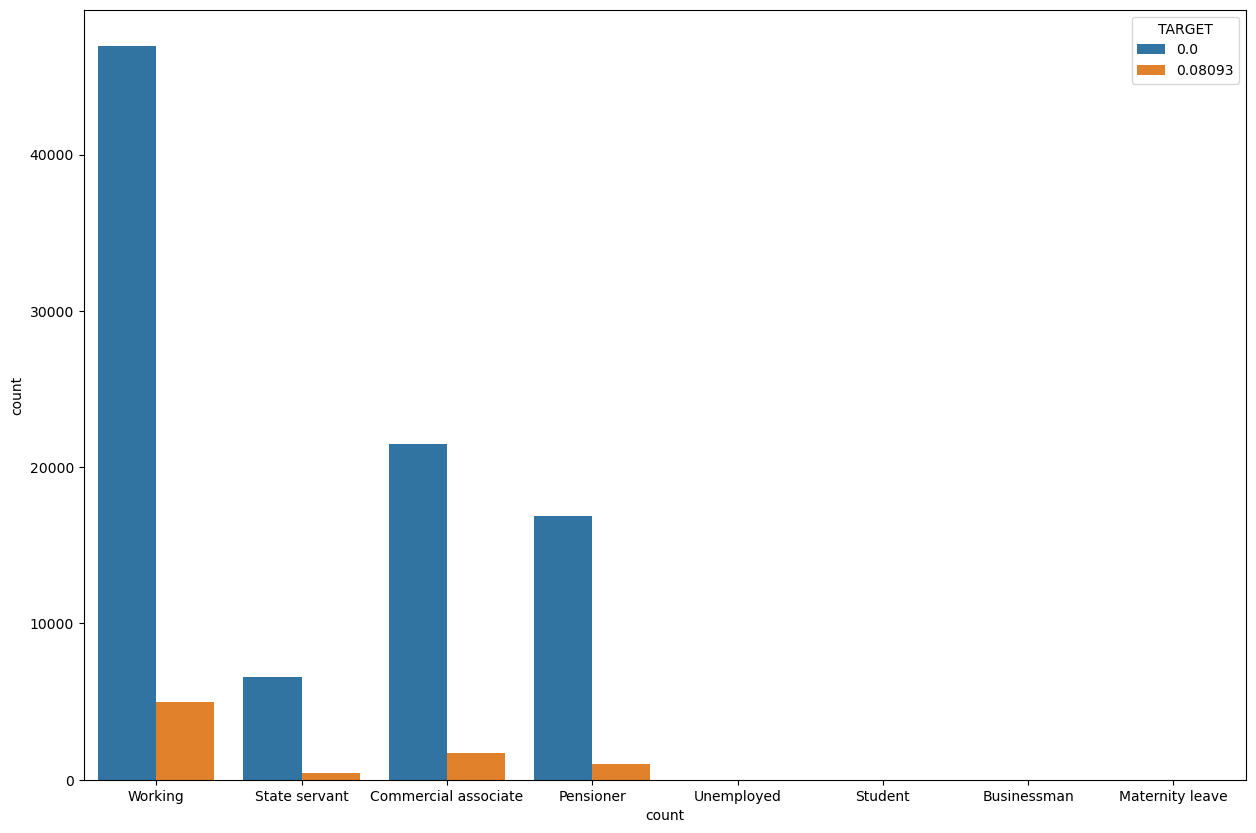

In [106]:
sns.countplot(data=df,x='NAME_INCOME_TYPE',hue='TARGET')
plt.xlabel('count')

plt.show()

##### the worling employees has the highest number of  0.0 target 

#### Relationship between family status and target

In [108]:
target_family= df.pivot_table(index=['NAME_FAMILY_STATUS'],values='SK_ID_CURR',columns='TARGET',aggfunc='count')
target_family

TARGET,0.00000,0.08093
NAME_FAMILY_STATUS,,
Civil marriage,8773.0,996.0
Married,59264.0,4794.0
Separated,5803.0,544.0
Single / not married,13113.0,1458.0
Unknown,1.0,NaN
Widow,4953.0,301.0


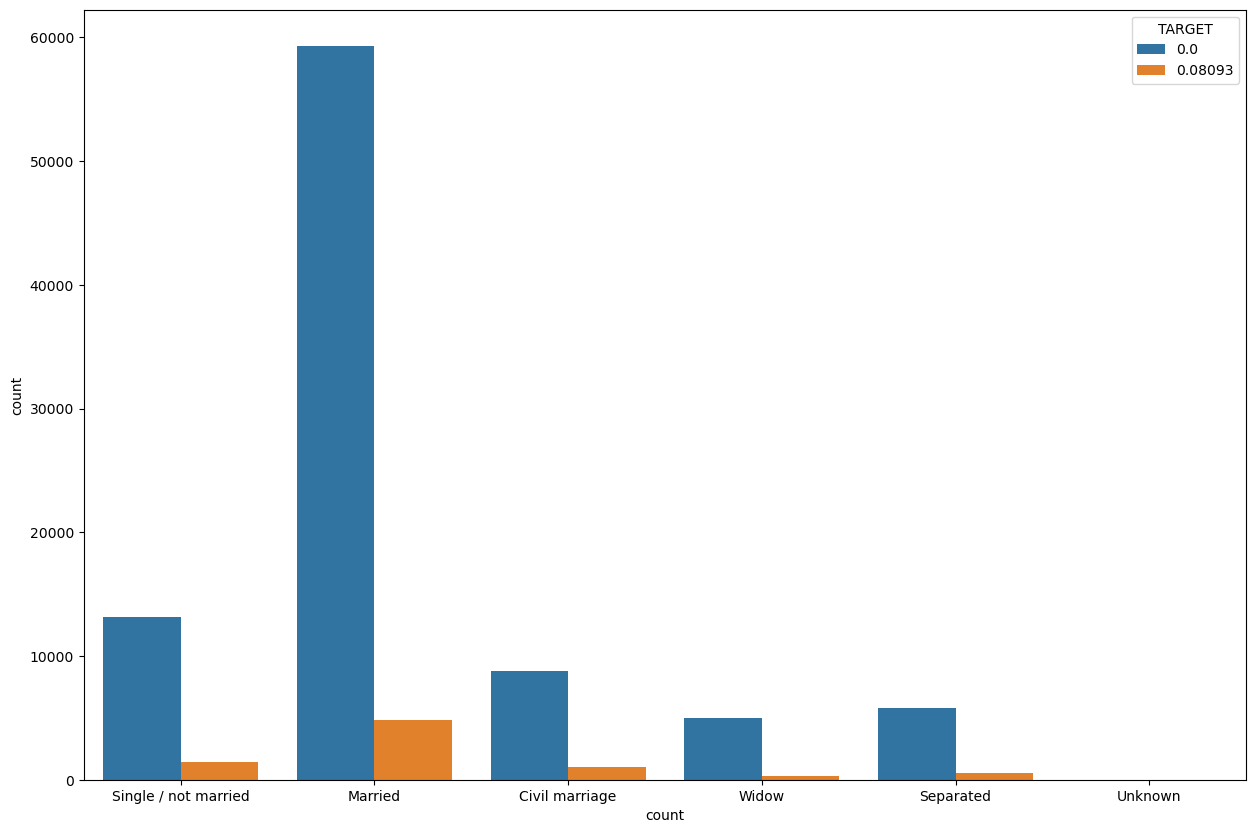

In [109]:
sns.countplot(data=df,x='NAME_FAMILY_STATUS',hue='TARGET')
plt.xlabel('count')

plt.show()

##### The married has the highest target among all others 

#### Relationship between Target and average income

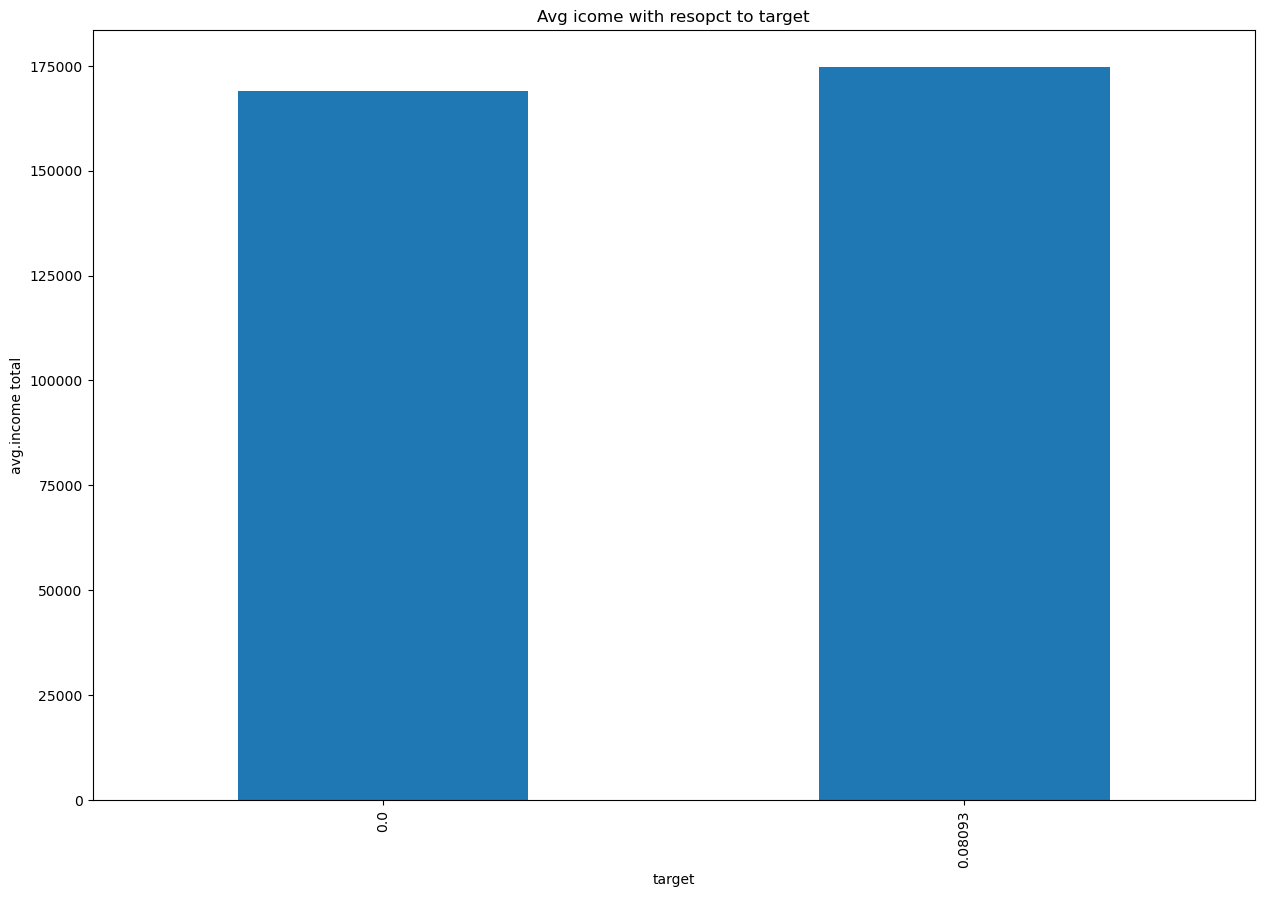

In [111]:
Target_average_income = df.groupby(['TARGET'])['AMT_INCOME_TOTAL'].aggregate(lambda x: x.mean()).plot(kind='bar' ,xlabel='target',ylabel='avg.income total' ,title='Avg icome with resopct to target')

In [117]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,0.08093,Cash loans,M,N,Y,169426.070273,202500.0,406597.5000,351000.0000,...,-637.0,1,1,0,1,0,Laborers,1.00000,WEDNESDAY,1
1,100003,0.00000,Cash loans,F,N,N,169426.070273,270000.0,599003.4465,538273.5894,...,-1188.0,1,1,0,1,0,Core staff,2.00000,MONDAY,1
2,100004,0.00000,Revolving loans,M,Y,Y,0.000000,67500.0,135000.0000,135000.0000,...,-225.0,1,1,1,1,0,Laborers,1.00000,MONDAY,0
3,100006,0.00000,Cash loans,F,N,Y,0.000000,135000.0,312682.5000,297000.0000,...,-3039.0,1,1,0,1,0,Laborers,2.00000,WEDNESDAY,1
4,100007,0.00000,Cash loans,M,N,Y,0.000000,121500.0,513000.0000,513000.0000,...,-3038.0,1,1,0,1,0,Core staff,1.00000,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0.00000,Cash loans,F,N,Y,0.417390,157500.0,599003.4465,538273.5894,...,-232.0,1,1,1,1,0,Sales staff,2.15567,MONDAY,1
99996,216087,0.00000,Cash loans,F,N,Y,169426.070273,225000.0,284400.0000,225000.0000,...,-182.0,1,1,0,1,0,Managers,2.15567,TUESDAY,1
99997,216088,0.00000,Cash loans,F,Y,Y,0.000000,135000.0,599003.4465,538273.5894,...,-4805.0,1,1,0,1,0,Sales staff,2.00000,TUESDAY,1
99998,216089,0.00000,Cash loans,F,Y,N,0.000000,135000.0,225000.0000,225000.0000,...,-340.0,1,1,0,1,0,Sales staff,2.00000,FRIDAY,2


In [121]:
df.shape

(100000, 24)

In [124]:
df.describe(include='all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
count,100000.000000,100000.000000,100000,100000,100000,100000,100000.000000,1.000000e+05,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000,100000.000000,100000,100000.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,7,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,TUESDAY,NaN
freq,NaN,NaN,90517,65855,66018,69328,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,49201,NaN,17408,NaN
mean,158006.140860,0.006550,NaN,NaN,NaN,NaN,66218.558733,1.694261e+05,440522.091389,393802.630914,...,9348.715581,0.999990,0.82128,0.199740,0.997990,0.056190,NaN,1.823103,NaN,0.931210
std,33481.166996,0.022072,NaN,NaN,NaN,NaN,82669.877024,3.835007e+05,171663.068869,152937.884287,...,25247.627874,0.003162,0.38312,0.399807,0.044788,0.230289,NaN,0.439572,NaN,0.343917
min,100002.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,45000.000000,45000.000000,...,-17531.000000,0.000000,0.00000,0.000000,0.000000,0.000000,NaN,1.000000,NaN,0.000000
25%,129076.750000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,270000.000000,238500.000000,...,-2758.000000,1.000000,1.00000,0.000000,1.000000,0.000000,NaN,2.000000,NaN,1.000000
50%,157877.000000,0.000000,NaN,NaN,NaN,NaN,0.417390,1.440000e+05,513040.500000,450000.000000,...,-1219.000000,1.000000,1.00000,0.000000,1.000000,0.000000,NaN,2.000000,NaN,1.000000
75%,186982.250000,0.000000,NaN,NaN,NaN,NaN,169426.070273,2.025000e+05,599003.446500,538273.589400,...,-291.000000,1.000000,1.00000,0.000000,1.000000,0.000000,NaN,2.155670,NaN,1.000000


In [132]:
df['TARGET'] = df['TARGET'].astype(int)

In [142]:
df2 = df[df['TARGET']==1]
df2

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED


In [141]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE',
       'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           100000 non-null  int64  
 1   TARGET               100000 non-null  int32  
 2   NAME_CONTRACT_TYPE   100000 non-null  object 
 3   GENDER               100000 non-null  object 
 4   Car                  100000 non-null  object 
 5   House                100000 non-null  object 
 6   CNT_CHILDREN         100000 non-null  float64
 7   AMT_INCOME_TOTAL     100000 non-null  float64
 8   AMT_CREDIT           100000 non-null  float64
 9   AMT_GOODS_PRICE      100000 non-null  float64
 10  NAME_TYPE_SUITE      100000 non-null  object 
 11  NAME_INCOME_TYPE     100000 non-null  object 
 12  NAME_EDUCATION_TYPE  100000 non-null  object 
 13  NAME_FAMILY_STATUS   100000 non-null  object 
 14  DAYS_EMPLOYED        100000 non-null  float64
 15  MOBILE            

#### I have filtered data to see how many can repay the loan and also i have filtered the data of the people who can't pay the loan 
- I have filtered the data by income of the person should be greater than 5000 
- Children of the family should be less than 3 members
- Having no houses of their own 
- These are the members who can became as a defaulter 


In [158]:
income_threshold = 50000
max_children_allowed = 3

In [159]:
rejected_loans = df[(df['AMT_INCOME_TOTAL'] < income_threshold) | (df['CNT_CHILDREN'] > max_children_allowed) & (df["House"]=="N") ]
rejected_loans_df = pd.DataFrame(rejected_loans)
rejected_loans_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
1,100003,0,Cash loans,F,N,N,169426.070273,270000.000,599003.4465,538273.5894,...,-1188.00000,1,1,0,1,0,Core staff,2.00000,MONDAY,1
11,100015,0,Cash loans,F,N,Y,0.000000,38419.155,148365.0000,135000.0000,...,63292.22206,1,0,0,1,0,Laborers,2.00000,FRIDAY,1
13,100017,0,Cash loans,M,Y,N,169426.070273,225000.000,599003.4465,538273.5894,...,-3028.00000,1,1,0,1,0,Drivers,2.15567,THURSDAY,1
22,100026,0,Cash loans,F,N,N,169426.070273,450000.000,497520.0000,450000.0000,...,-4306.00000,1,1,0,1,0,Sales staff,2.15567,THURSDAY,1
33,100039,0,Cash loans,M,Y,N,169426.070273,360000.000,599003.4465,538273.5894,...,-2060.00000,1,1,0,1,0,Drivers,2.15567,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99973,216063,0,Cash loans,F,N,N,169426.070273,337500.000,599003.4465,538273.5894,...,-1375.00000,1,1,1,1,0,Laborers,2.00000,FRIDAY,1
99978,216069,0,Cash loans,M,Y,N,169426.070273,315000.000,263686.5000,238500.0000,...,-9566.00000,1,1,0,1,0,Low-skill Laborers,2.00000,SUNDAY,1
99981,216072,0,Cash loans,F,N,Y,0.000000,35100.000,294322.5000,243000.0000,...,63292.22206,1,0,0,1,0,Laborers,2.00000,SUNDAY,1
99991,216082,0,Cash loans,M,Y,N,169426.070273,270000.000,450000.0000,450000.0000,...,-5525.00000,1,1,0,1,0,Managers,2.15567,MONDAY,1


#### if possible, These are the customers , who can become as a defaulters to pay the loan 
- Because their Income is less than 5000 , so there is less possible of repaying the loan